In [1]:
import os
import sys
one_level_up_dir = os.path.abspath(os.path.join(os.getcwd(), "../../"))
sys.path.append(one_level_up_dir)
import jax._src.random as prng
import jax
from jax import config, jit
import jax.numpy as jnp
import jax.random as jr
import diffrax as dfx
import matplotlib.pyplot as plt
import optax as ox
import equinox as eqx
from gpdx.systems.nonlinear_dynamics import VanDerPol
from gpdx.control.trajectory_optimizers import *
from gpdx.control.cost_functions import QuadraticCost
# from gpdx.dataset import DiffEqDataset
from gpdx.nn.node import NeuralODE, EnsembleNeuralODE
from gpdx.nn.nnvectorfield import NeuralVectorField, EnsembleNeuralVectorField

from gpdx.fit import *
config.update("jax_enable_x64", True)
config.update("jax_debug_nans", True)
PRNGKey = prng.KeyArray
key = jr.PRNGKey(123) 
key, subkey = jr.split(key)
%load_ext autoreload
%autoreload 2

KeyboardInterrupt: 

In [ ]:
from gpdx.control.control_task import VanderPolStabilization
env = VanderPolStabilization()
env


VanderPolStabilization(
  real_system=VanDerPol(
    D_sys=2,
    D_control=1,
    solver=Dopri8(scan_kind=None),
    name='Van der Pol',
    control_interpolator='linear',
    mu=1.5
  ),
  D_sys=2,
  D_control=1,
  R=f64[1,1],
  Q=f64[2,2],
  x_star=f64[2],
  u_star=f64[1],
  y0=f64[2],
  t0=0.0,
  tf=10.0,
  Delta_t=0.05,
  measurement_noise_std=0.01,
  lb=-2.0,
  ub=2.0,
  state_cost=QuadraticCost(
    Q=f64[2,2],
    R=f64[1,1],
    x_star=f64[2],
    u_star=f64[1],
    transform=None
  ),
  termination_cost=QuadraticCost(
    Q=f64[2,2],
    R=f64[1,1],
    x_star=f64[2],
    u_star=f64[1],
    transform=None
  ),
  H=None,
  Q_f=f64[2,2],
  name='Van der Pol stabilization control task'
)

## data generation

In [ ]:
# initial state distribution
real_system = env.real_system
# x0_distribution = lambda key: jnp.array([1.,1.])#.1*(jr.uniform(key=key, shape=(2,))-0.5)
key, subkey = jr.split(key)
t0 = env.t0
tf = env.tf

## Compute mean objective with SQP

traj. opt. times:  [0.0953, 0.1007, 0.1027, 0.0974, 0.0953, 0.095, 0.0948, 0.0935, 0.0934, 0.0935]


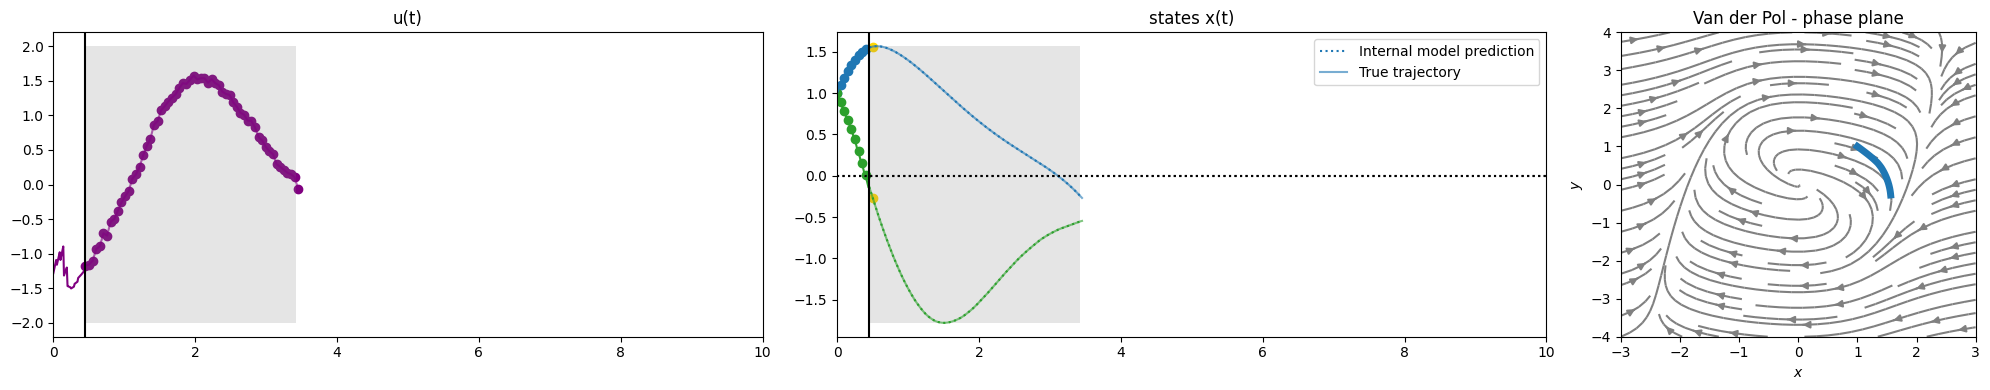

traj. opt. times:  [0.199, 0.1605, 0.1323, 0.0984, 0.0981, 0.0986, 0.0979, 0.0966, 0.0985, 0.0971]


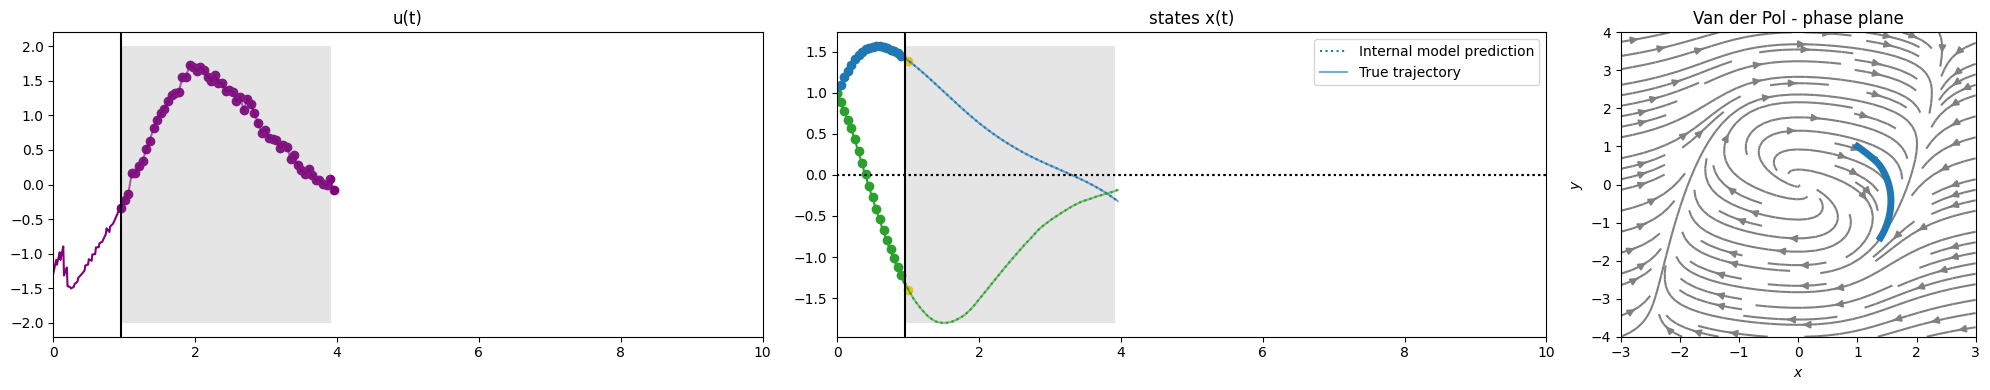

traj. opt. times:  [0.1139, 0.1025, 0.1018, 0.0969, 0.0966, 0.0978, 0.1001, 0.0968, 0.0971, 0.0976]


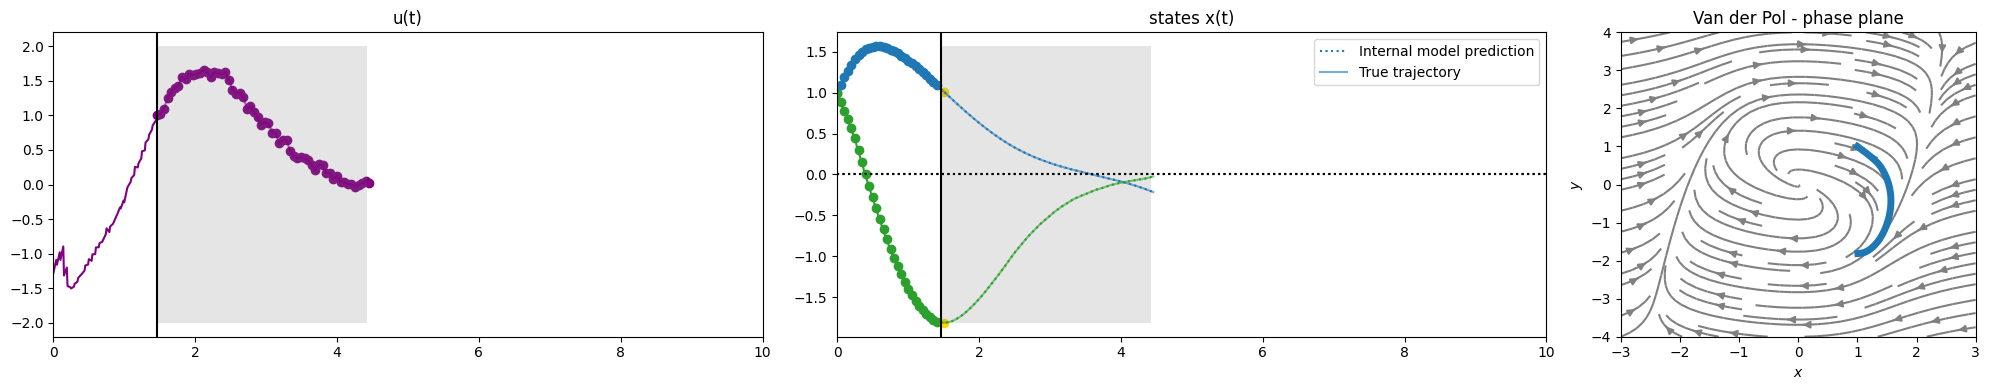

traj. opt. times:  [0.111, 0.098, 0.0983, 0.0988, 0.1128, 0.1153, 0.126, 0.1031, 0.1024, 0.1073]


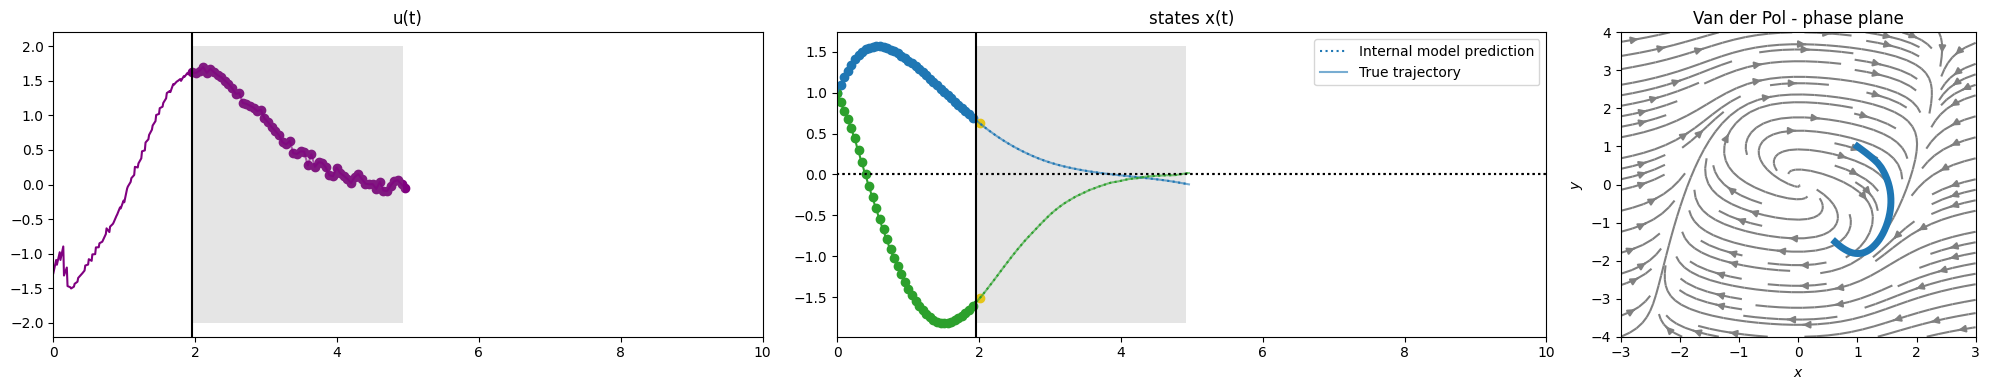

traj. opt. times:  [0.0996, 0.0961, 0.1012, 0.096, 0.0993, 0.1043, 0.0966, 0.0976, 0.0945, 0.1114]


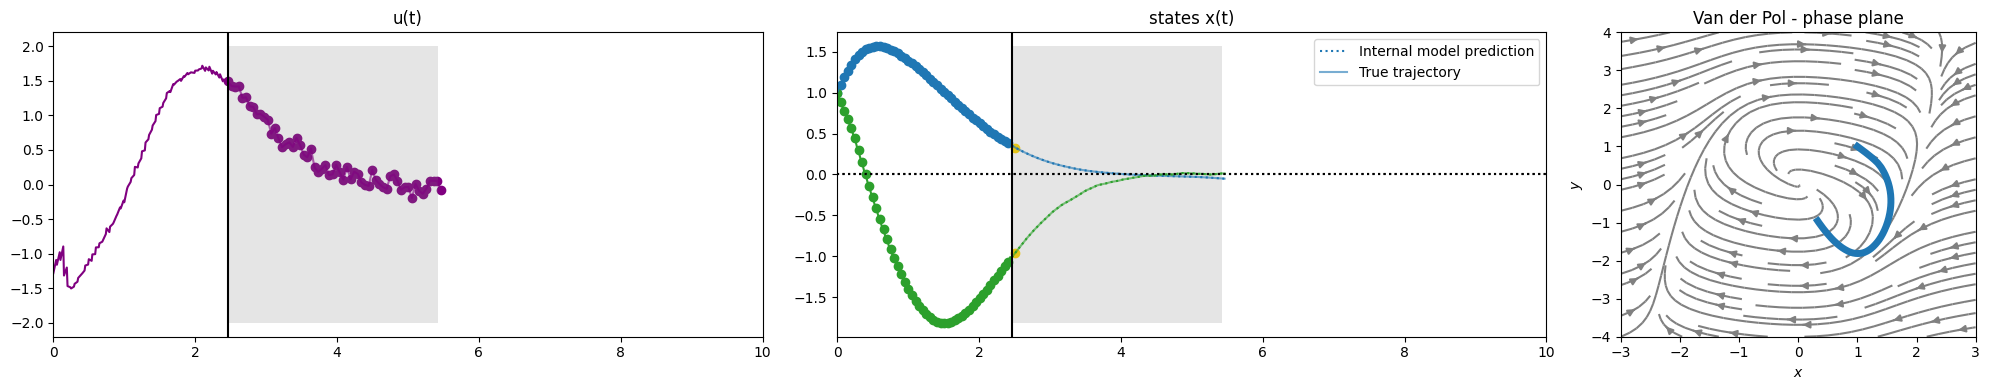

traj. opt. times:  [0.1013, 0.0976, 0.0979, 0.0959, 0.0956, 0.0939, 0.0968, 0.0955, 0.0963, 0.0946]


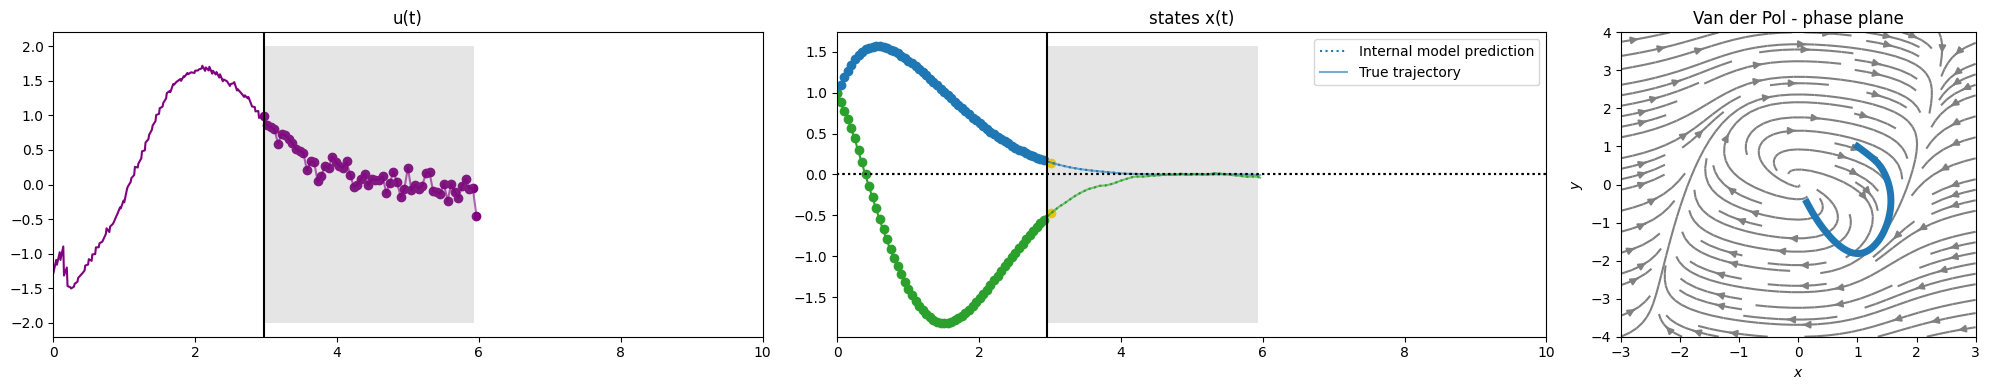

traj. opt. times:  [0.0999, 0.0962, 0.0949, 0.0946, 0.0963, 0.101, 0.0964, 0.095, 0.0968, 0.0962]


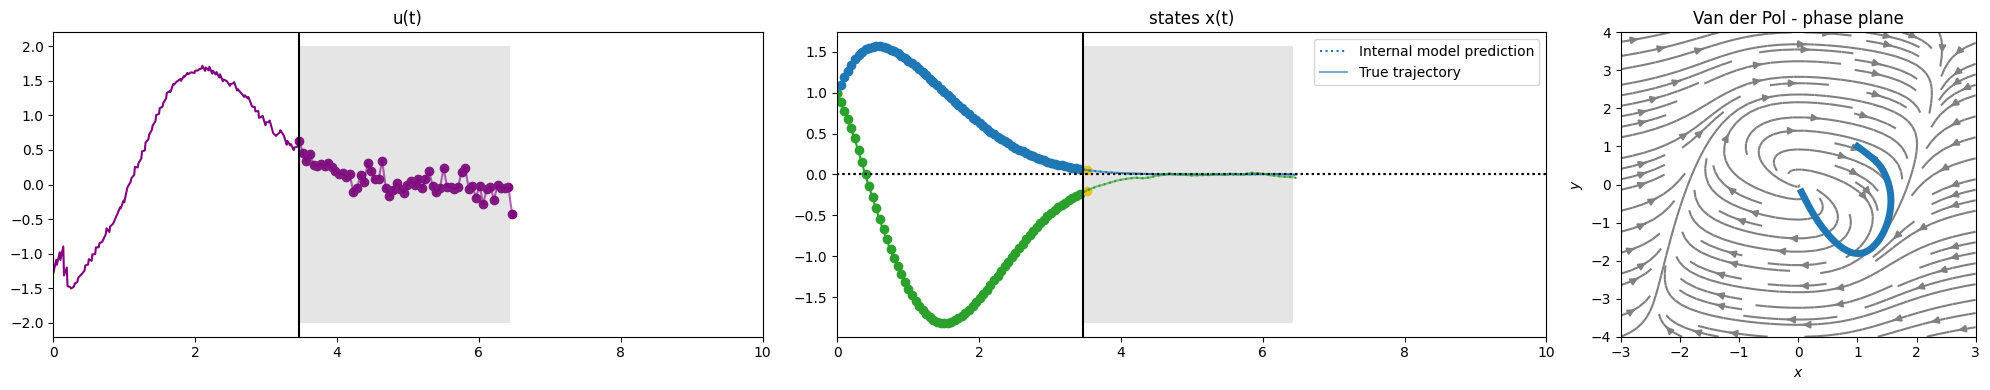

traj. opt. times:  [0.098, 0.097, 0.0943, 0.0957, 0.0946, 0.0952, 0.0954, 0.0952, 0.0944, 0.0983]


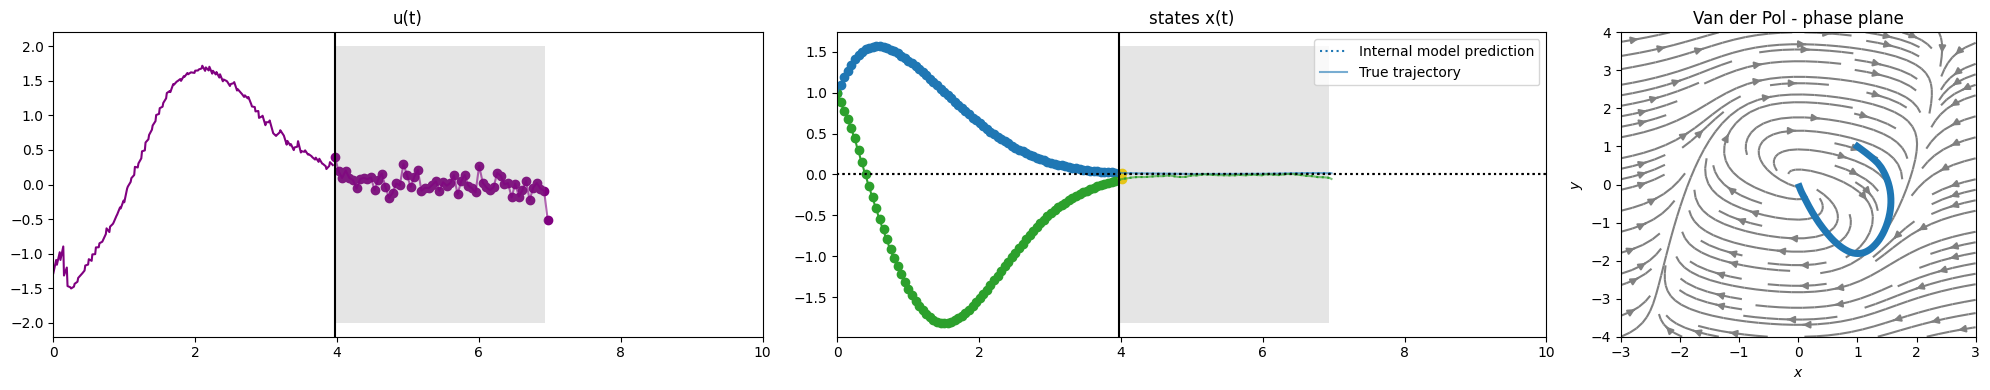

traj. opt. times:  [0.0988, 0.0918, 0.0905, 0.0912, 0.0903, 0.091, 0.0913, 0.0914, 0.0902, 0.0912]


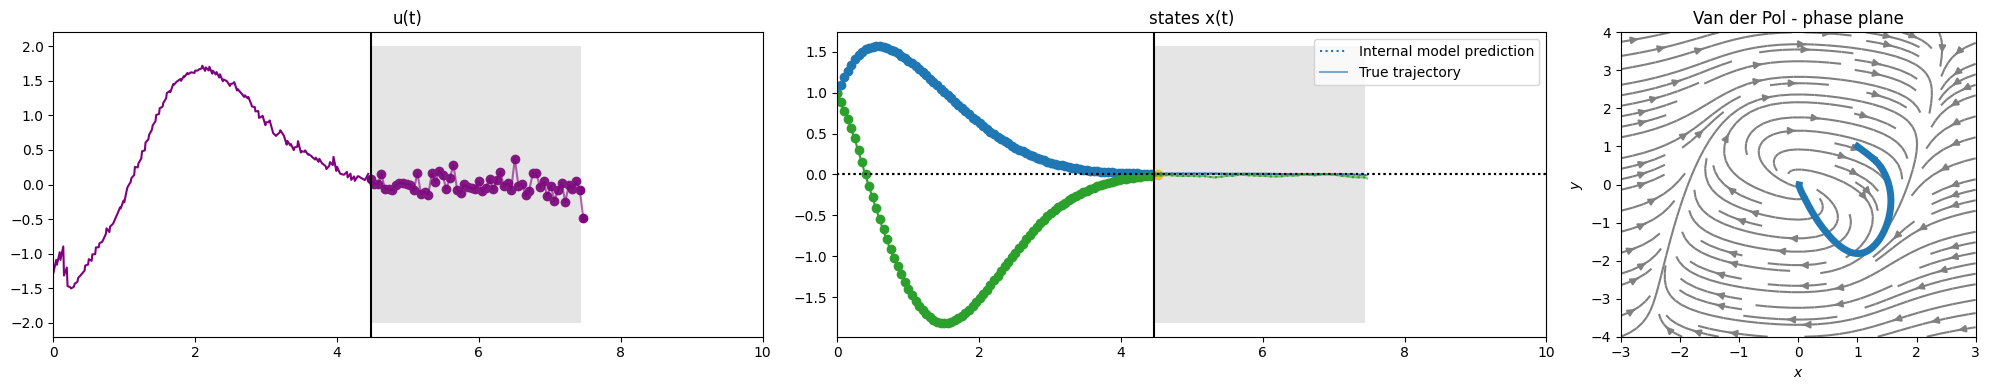

traj. opt. times:  [0.0914, 0.0904, 0.092, 0.0961, 0.095, 0.0944, 0.0979, 0.0992, 0.0944, 0.0959]


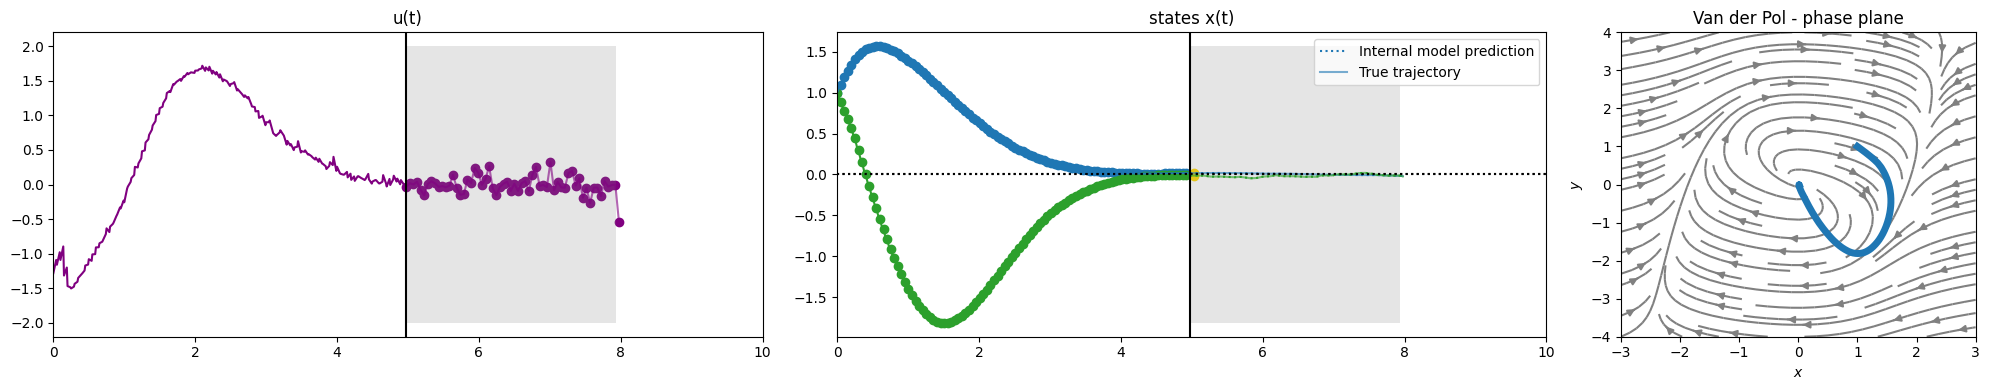

traj. opt. times:  [0.0976, 0.0956, 0.0942, 0.0947, 0.0958, 0.0984, 0.0937, 0.094, 0.0959, 0.0964]


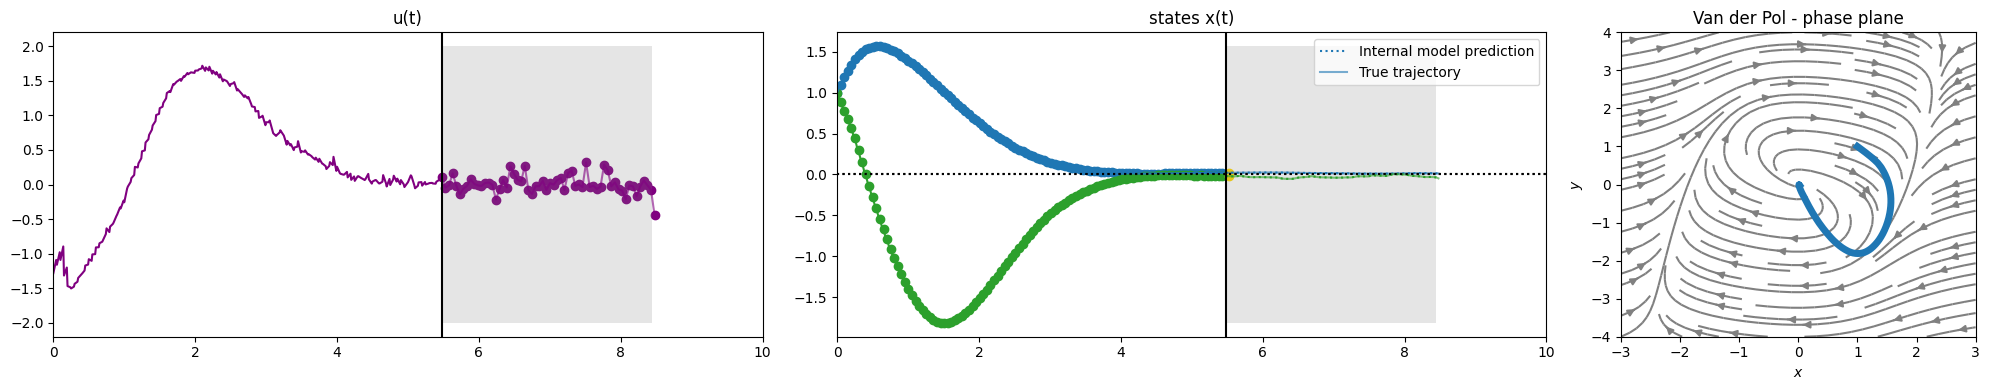

traj. opt. times:  [0.1019, 0.0984, 0.1018, 0.1109, 0.1007, 0.098, 0.1009, 0.0996, 0.1052, 0.0998]


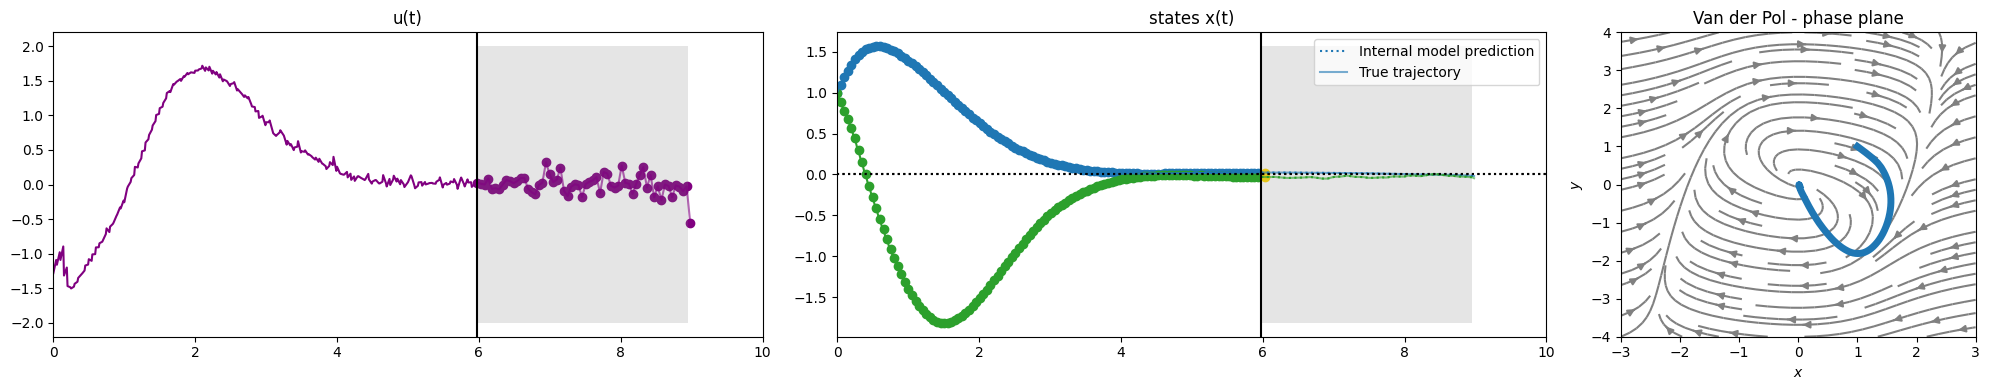

traj. opt. times:  [0.1192, 0.1021, 0.1042, 0.1045, 0.1053, 0.1033, 0.1038, 0.1048, 0.1036, 0.1076]


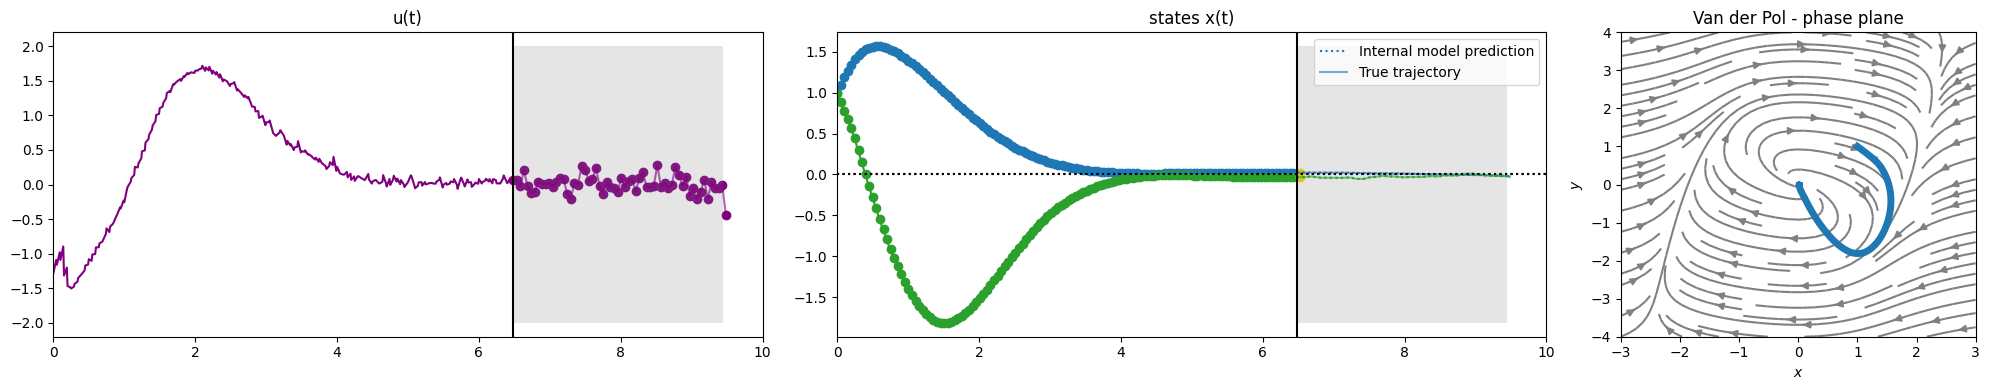

traj. opt. times:  [0.1055, 0.1017, 0.0995, 0.0948, 0.0963, 0.098, 0.1501, 0.1379, 0.0969, 0.1406]


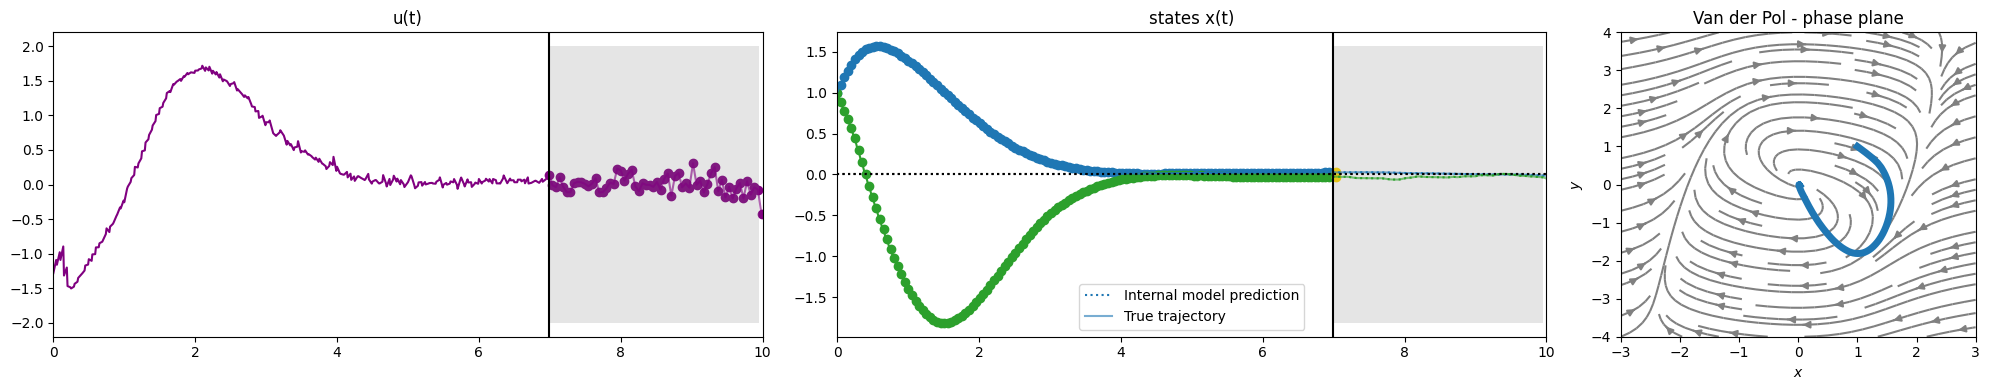

traj. opt. times:  [0.1028, 0.1027, 0.0951, 0.0955, 0.096, 0.0949, 0.0951, 0.0961, 0.0954, 0.0962]


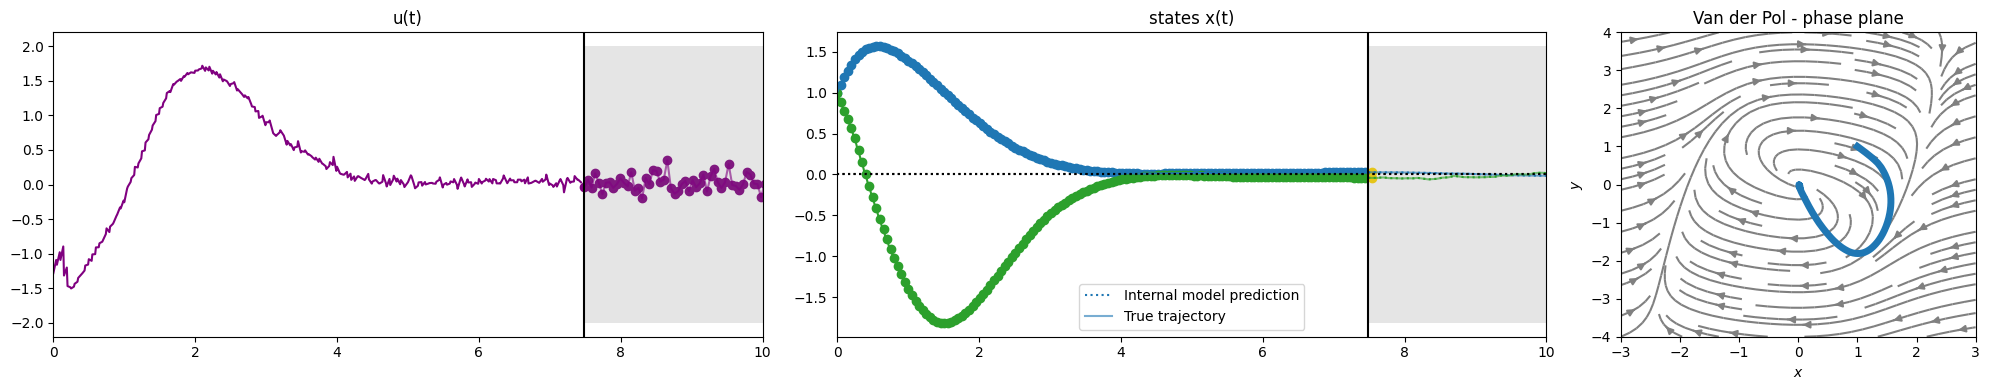

traj. opt. times:  [0.1029, 0.1003, 0.0969, 0.0962, 0.0969, 0.0954, 0.0956, 0.0956, 0.0957, 0.0949]


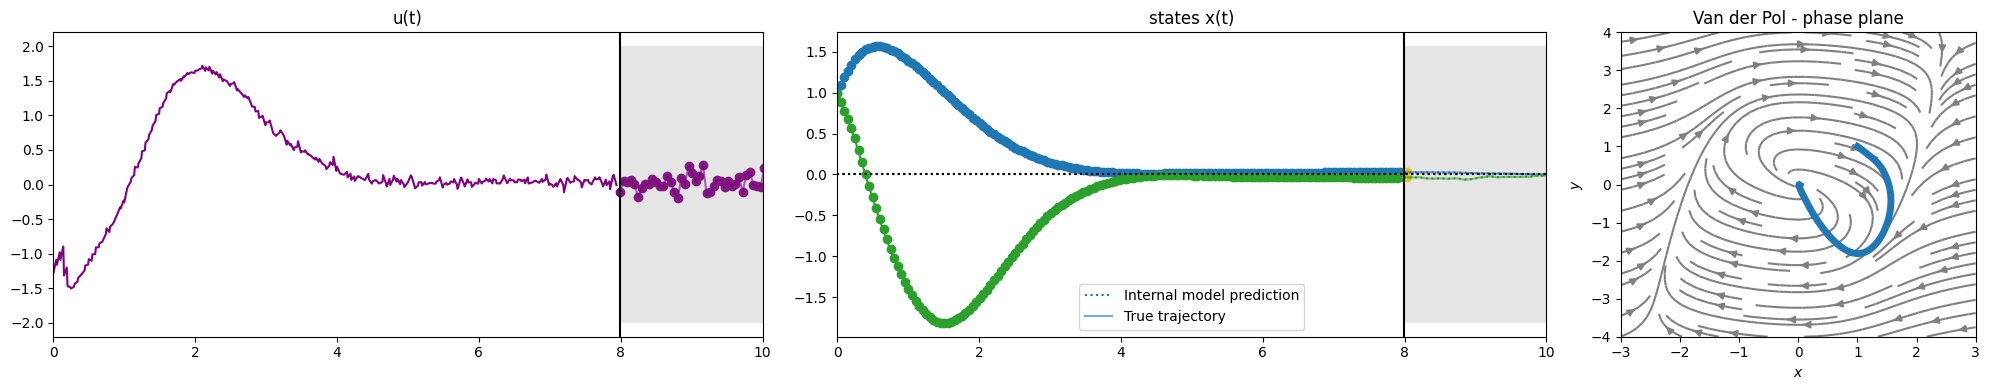

traj. opt. times:  [0.0985, 0.1023, 0.0945, 0.0956, 0.0956, 0.1014, 0.1023, 0.0996, 0.0974, 0.0967]


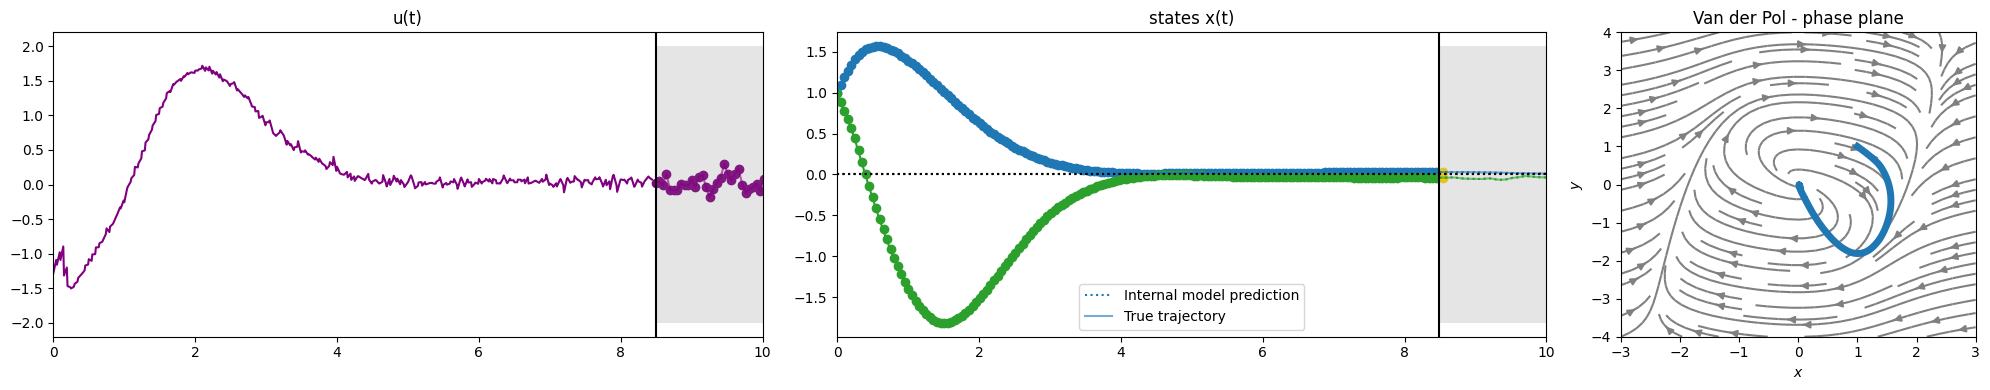

traj. opt. times:  [0.1018, 0.0927, 0.0916, 0.0916, 0.091, 0.0906, 0.091, 0.092, 0.0914, 0.0908]


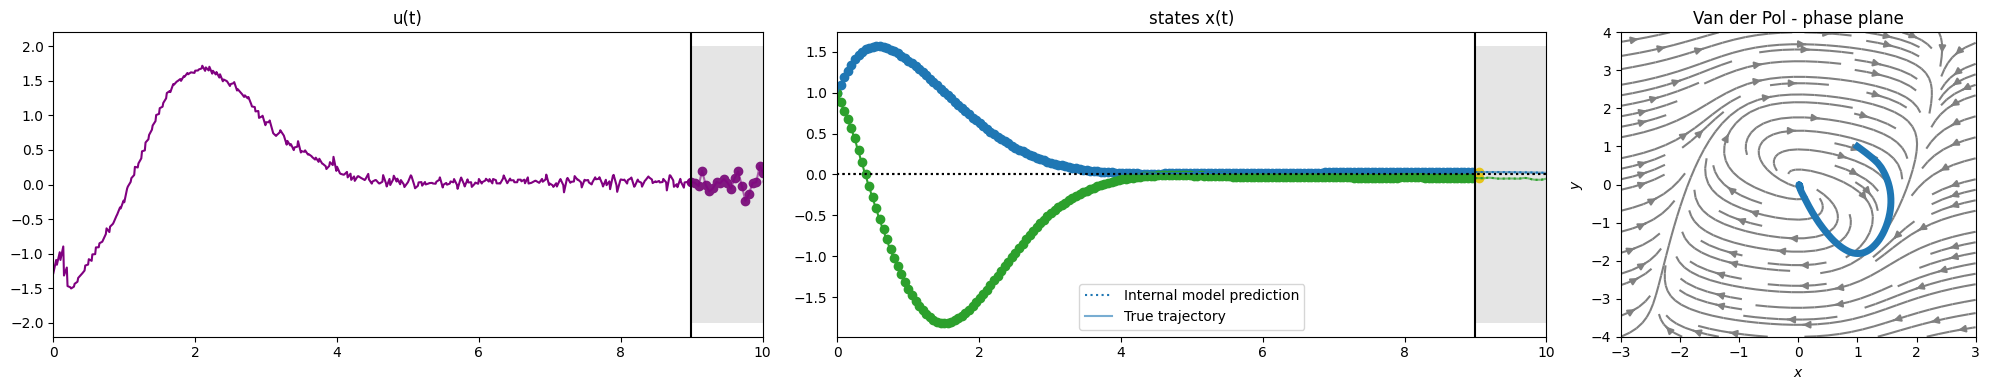

traj. opt. times:  [0.0919, 0.0899, 0.0902, 0.0907, 0.0912, 0.0902, 0.0913, 0.091, 0.091, 0.0905]


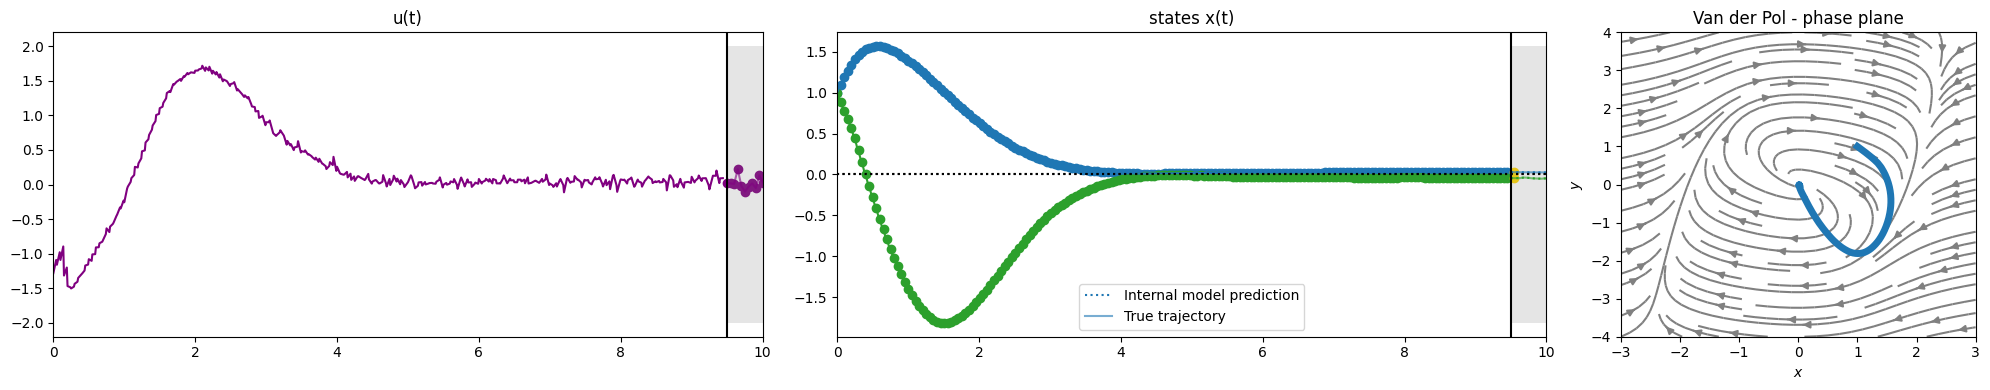

traj. opt. times:  [0.0934, 0.0956, 0.0964, 0.1119, 0.0945, 0.0924, 0.0969, 0.0957, 0.0959, 0.0988]


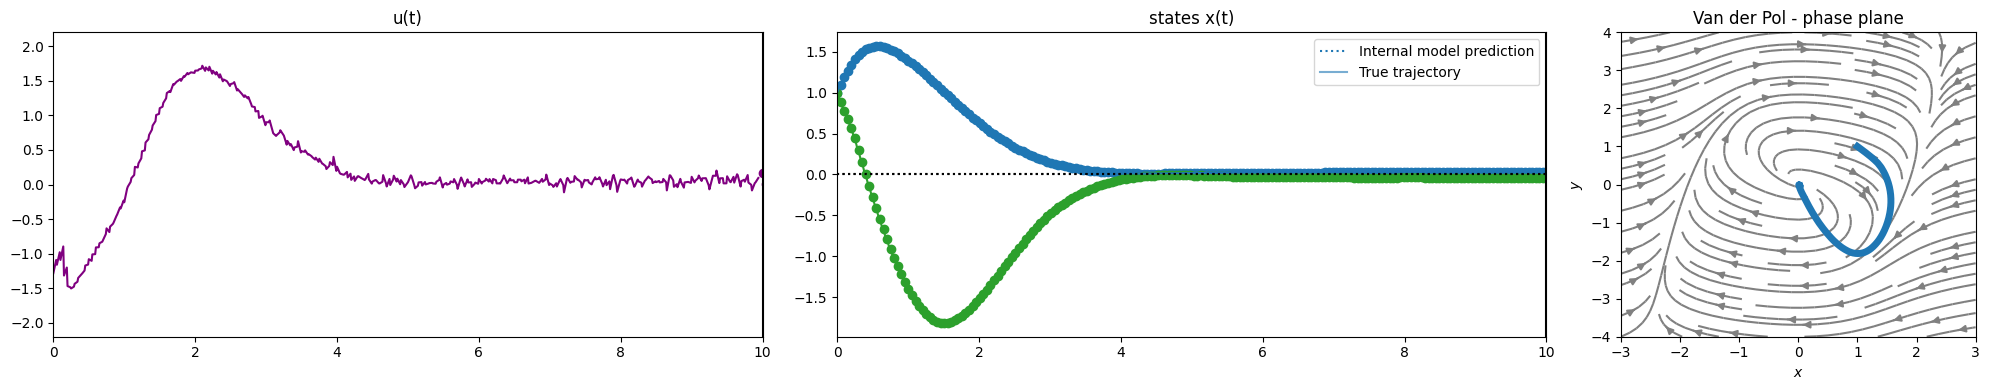

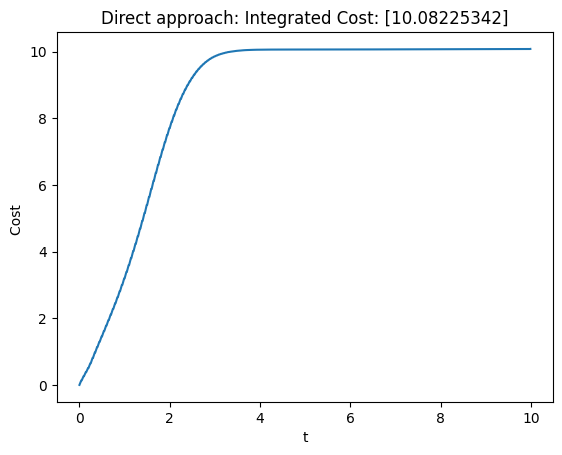

In [ ]:

maxiter = 15
from gpdx.control.mpc import *
H = 3.
us_init = 0.*jr.normal(key=subkey**2, shape=(jnp.arange(0, H, env.Delta_t).shape[0], 1))
key, subkey = jr.split(key)

sqp_solver = LBFGSB(
                # pop_size=500, 
                # elite_size=50,
                # init_var=4,
            lb=env.lb*jnp.ones_like(us_init),
            ub=env.ub*jnp.ones_like(us_init),
            maxiter=maxiter,)
cem_solver = CEM(pop_size=500,
                 elite_size = int(0.13*500),
                 alpha=0.3, 
                 init_var = 1., 
                lb=env.lb*jnp.ones_like(us_init),
                ub=env.ub*jnp.ones_like(us_init),
                maxiter=maxiter,)

true_mpc = MPC(
        traj_optimizer=cem_solver,
        real_system=env.real_system,
        internal_system=env.real_system,
        state_cost=env.state_cost,
        termination_cost=env.termination_cost,
        verbose=True,
        )

ts, ts_dense, X, Y, U, R = true_mpc.simulate(x0=env.get_initial_condition(),
        ts=jnp.linspace(env.t0, env.tf, int( ((1/env.Delta_t))*(tf-t0))),
        Delta_t=env.Delta_t,
        dt0_dense=1e-2,
        x_star=env.x_star,
        H=H, 
        )



plt.plot(ts_dense, R)
plt.title(f'Direct approach: Integrated Cost: {R[-1]}')
plt.ylabel('Cost ')
plt.xlabel('t')
plt.show()

## Indirect approach

Initial optimization (iteration 0) not succesfull, continuing.
Succesful initial optimization at iteration 1:  [2.19081014 2.8330177 ]
Initial optimization over, starting trial with initial solution.
Traj. opt. times:  [(13.2315, Array(10, dtype=int64, weak_type=True)), (0.05, Array(11, dtype=int64, weak_type=True)), (0.0222, Array(11, dtype=int64, weak_type=True)), (0.0225, Array(11, dtype=int64, weak_type=True)), (0.0216, Array(11, dtype=int64, weak_type=True)), (0.0195, Array(11, dtype=int64, weak_type=True)), (0.0225, Array(11, dtype=int64, weak_type=True)), (0.0235, Array(10, dtype=int64, weak_type=True)), (0.0202, Array(10, dtype=int64, weak_type=True)), (0.0202, Array(10, dtype=int64, weak_type=True))]


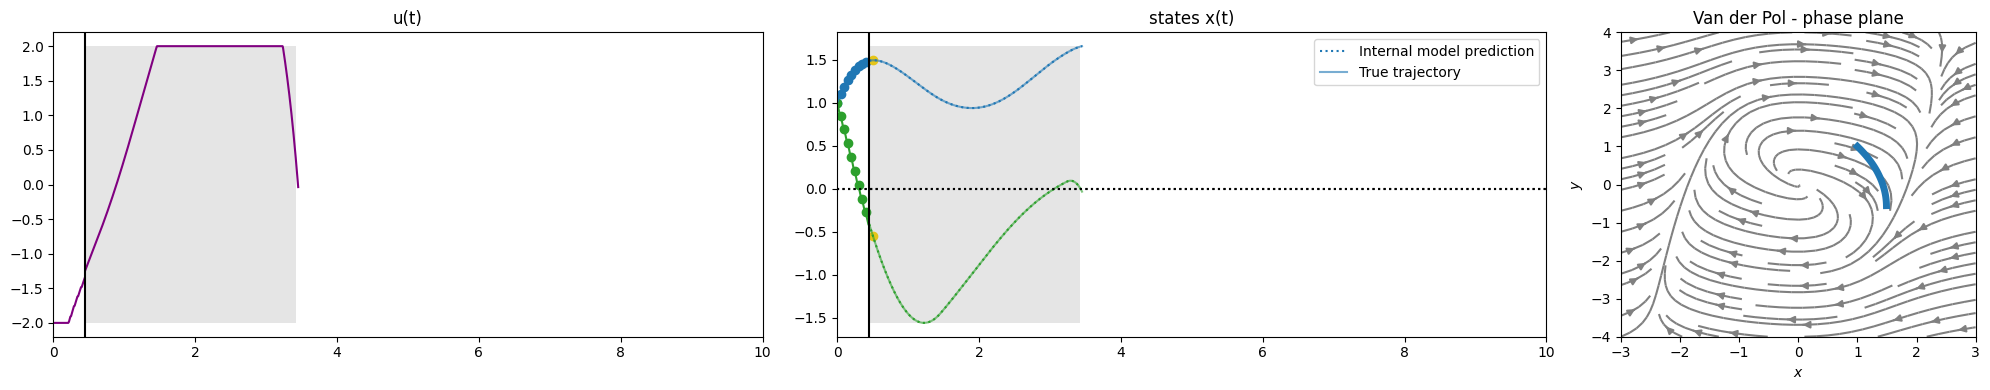

Traj. opt. times:  [(0.0369, Array(10, dtype=int64, weak_type=True)), (0.019, Array(9, dtype=int64, weak_type=True)), (0.0182, Array(9, dtype=int64, weak_type=True)), (0.0175, Array(9, dtype=int64, weak_type=True)), (0.017, Array(9, dtype=int64, weak_type=True)), (0.0185, Array(10, dtype=int64, weak_type=True)), (0.0171, Array(10, dtype=int64, weak_type=True)), (0.018, Array(10, dtype=int64, weak_type=True)), (0.0169, Array(10, dtype=int64, weak_type=True)), (0.0166, Array(10, dtype=int64, weak_type=True))]


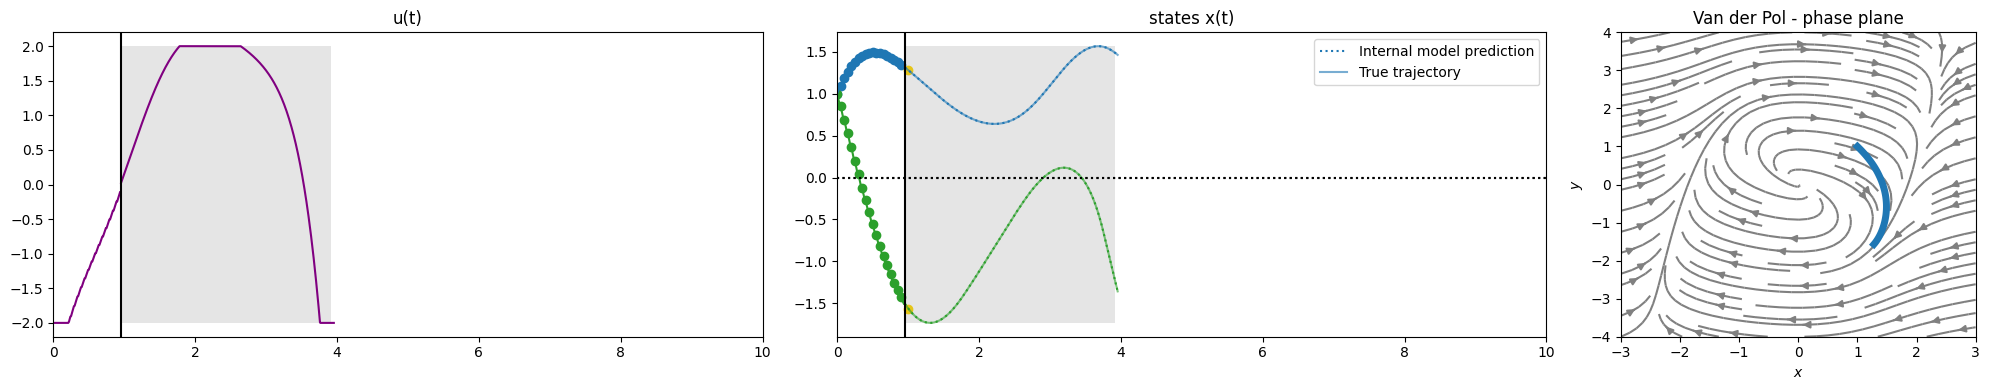

Traj. opt. times:  [(0.0222, Array(10, dtype=int64, weak_type=True)), (0.0208, Array(10, dtype=int64, weak_type=True)), (0.033, Array(10, dtype=int64, weak_type=True)), (0.033, Array(10, dtype=int64, weak_type=True)), (0.0348, Array(10, dtype=int64, weak_type=True)), (0.0447, Array(10, dtype=int64, weak_type=True)), (0.0229, Array(10, dtype=int64, weak_type=True)), (0.0209, Array(10, dtype=int64, weak_type=True)), (0.0208, Array(10, dtype=int64, weak_type=True)), (0.0196, Array(10, dtype=int64, weak_type=True))]


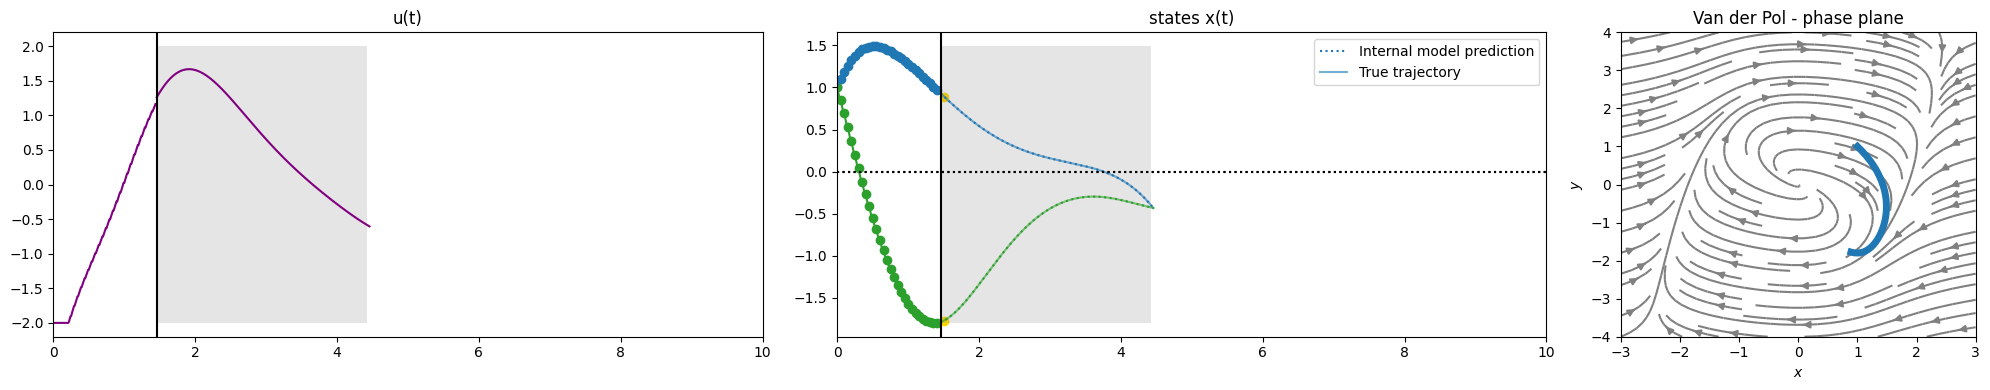

Traj. opt. times:  [(0.023, Array(10, dtype=int64, weak_type=True)), (0.0234, Array(10, dtype=int64, weak_type=True)), (0.0197, Array(10, dtype=int64, weak_type=True)), (0.0202, Array(10, dtype=int64, weak_type=True)), (0.021, Array(10, dtype=int64, weak_type=True)), (0.0201, Array(10, dtype=int64, weak_type=True)), (0.0202, Array(10, dtype=int64, weak_type=True)), (0.0203, Array(10, dtype=int64, weak_type=True)), (0.0206, Array(10, dtype=int64, weak_type=True)), (0.0188, Array(10, dtype=int64, weak_type=True))]


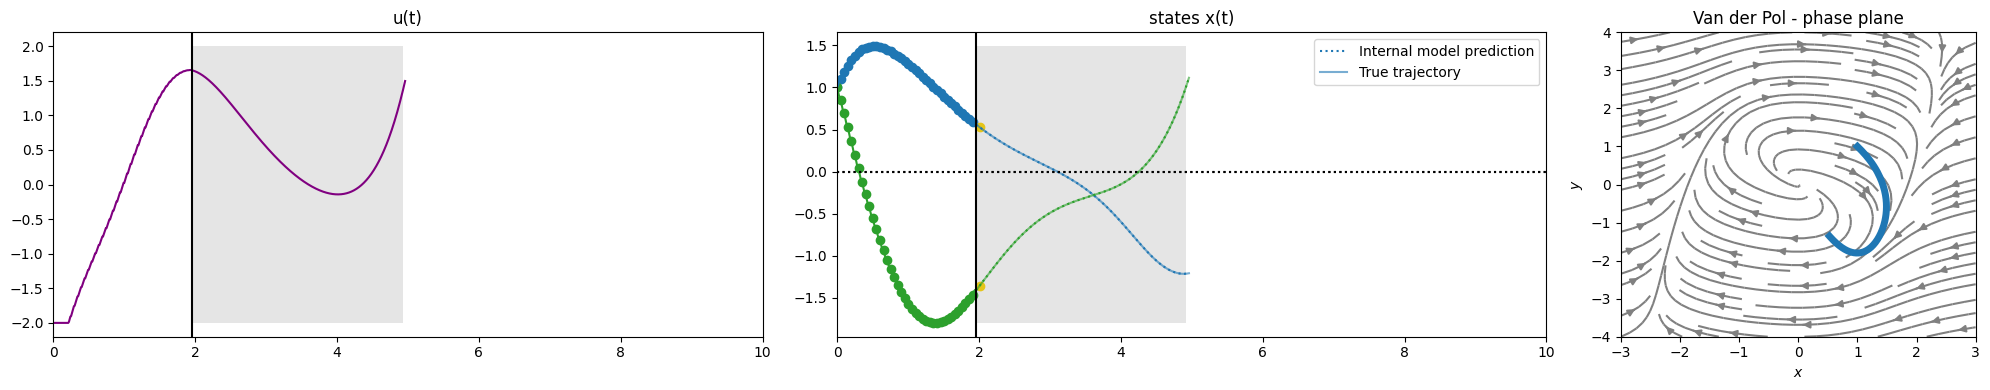

Traj. opt. times:  [(0.0196, Array(10, dtype=int64, weak_type=True)), (0.0198, Array(10, dtype=int64, weak_type=True)), (0.0207, Array(10, dtype=int64, weak_type=True)), (0.0213, Array(10, dtype=int64, weak_type=True)), (0.0196, Array(10, dtype=int64, weak_type=True)), (0.0278, Array(10, dtype=int64, weak_type=True)), (0.0223, Array(10, dtype=int64, weak_type=True)), (0.029, Array(10, dtype=int64, weak_type=True)), (0.0211, Array(10, dtype=int64, weak_type=True)), (0.0222, Array(10, dtype=int64, weak_type=True))]


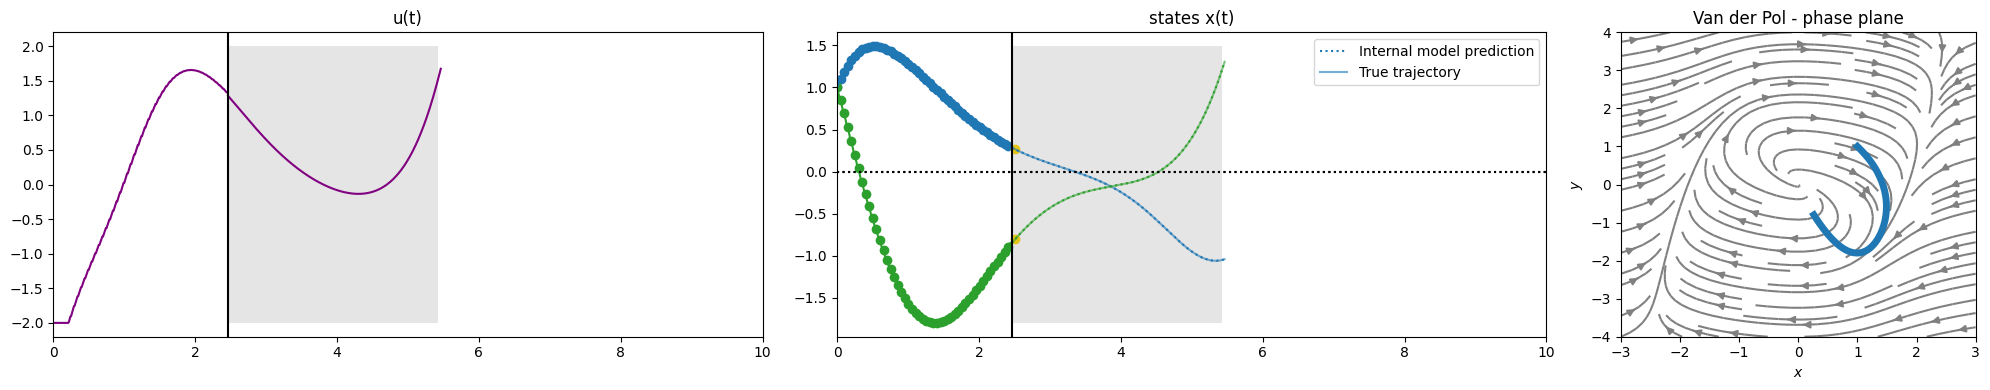

Traj. opt. times:  [(0.0504, Array(10, dtype=int64, weak_type=True)), (0.0196, Array(10, dtype=int64, weak_type=True)), (0.0199, Array(10, dtype=int64, weak_type=True)), (0.0188, Array(10, dtype=int64, weak_type=True)), (0.0188, Array(10, dtype=int64, weak_type=True)), (0.0194, Array(10, dtype=int64, weak_type=True)), (0.018, Array(10, dtype=int64, weak_type=True)), (0.0283, Array(10, dtype=int64, weak_type=True)), (0.0196, Array(10, dtype=int64, weak_type=True)), (0.0202, Array(10, dtype=int64, weak_type=True))]


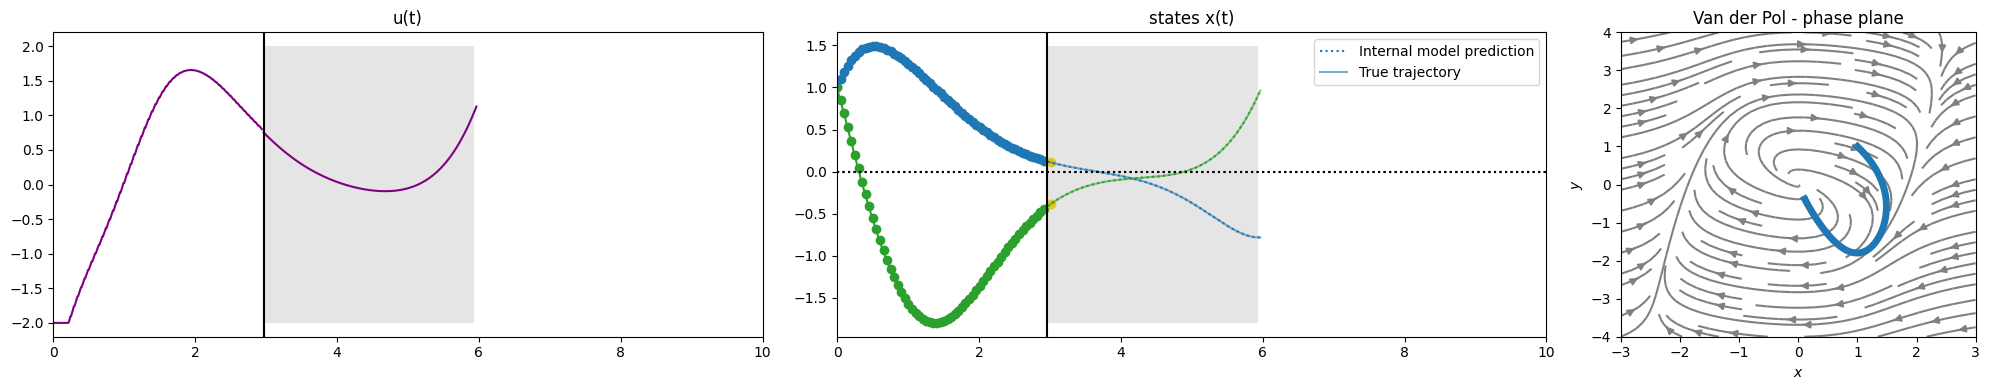

Traj. opt. times:  [(0.0613, Array(10, dtype=int64, weak_type=True)), (0.0193, Array(10, dtype=int64, weak_type=True)), (0.0197, Array(10, dtype=int64, weak_type=True)), (0.0213, Array(10, dtype=int64, weak_type=True)), (0.0191, Array(10, dtype=int64, weak_type=True)), (0.0195, Array(10, dtype=int64, weak_type=True)), (0.0198, Array(10, dtype=int64, weak_type=True)), (0.0199, Array(10, dtype=int64, weak_type=True)), (0.0196, Array(10, dtype=int64, weak_type=True)), (0.0195, Array(10, dtype=int64, weak_type=True))]


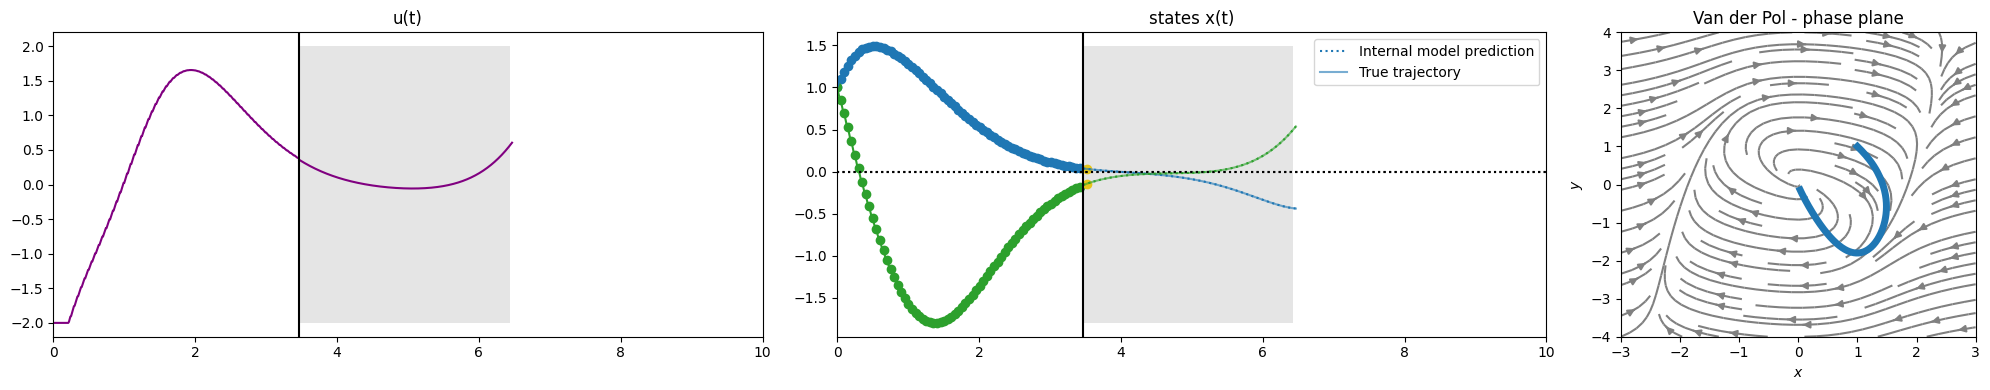

Traj. opt. times:  [(0.0321, Array(10, dtype=int64, weak_type=True)), (0.0203, Array(10, dtype=int64, weak_type=True)), (0.0215, Array(9, dtype=int64, weak_type=True)), (0.0265, Array(9, dtype=int64, weak_type=True)), (0.0268, Array(9, dtype=int64, weak_type=True)), (0.0238, Array(10, dtype=int64, weak_type=True)), (0.0215, Array(10, dtype=int64, weak_type=True)), (0.0232, Array(10, dtype=int64, weak_type=True)), (0.021, Array(10, dtype=int64, weak_type=True)), (0.0198, Array(10, dtype=int64, weak_type=True))]


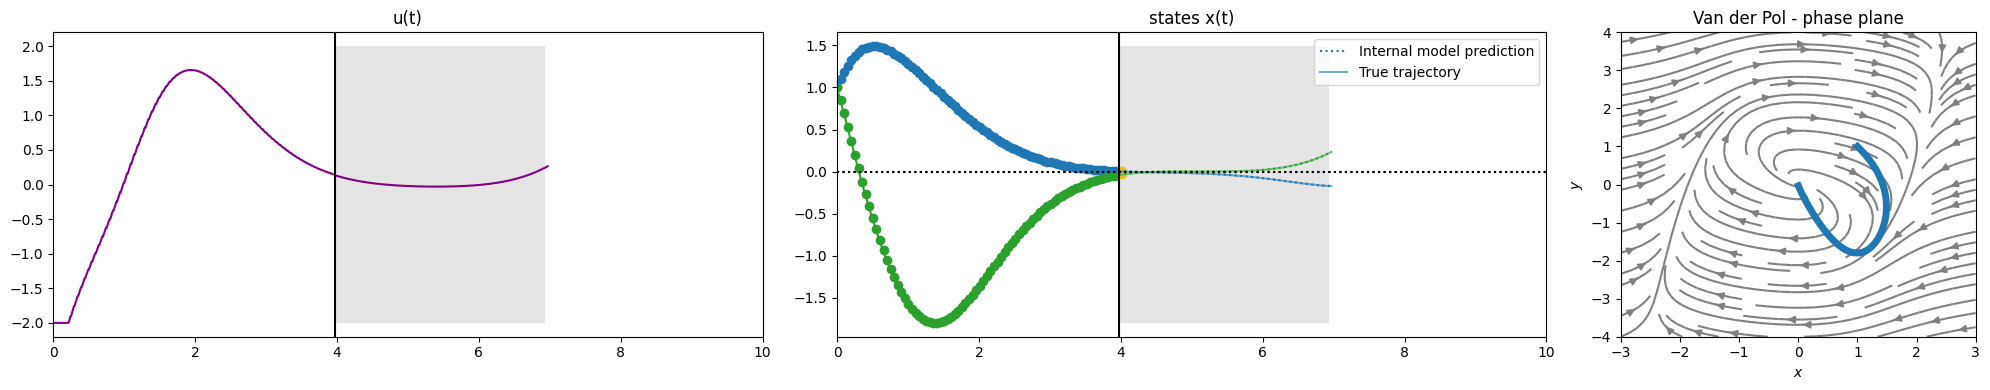

Traj. opt. times:  [(0.0532, Array(10, dtype=int64, weak_type=True)), (0.0218, Array(10, dtype=int64, weak_type=True)), (0.0229, Array(10, dtype=int64, weak_type=True)), (0.0207, Array(10, dtype=int64, weak_type=True)), (0.028, Array(10, dtype=int64, weak_type=True)), (0.023, Array(10, dtype=int64, weak_type=True)), (0.0223, Array(10, dtype=int64, weak_type=True)), (0.0193, Array(10, dtype=int64, weak_type=True)), (0.0205, Array(10, dtype=int64, weak_type=True)), (0.0203, Array(10, dtype=int64, weak_type=True))]


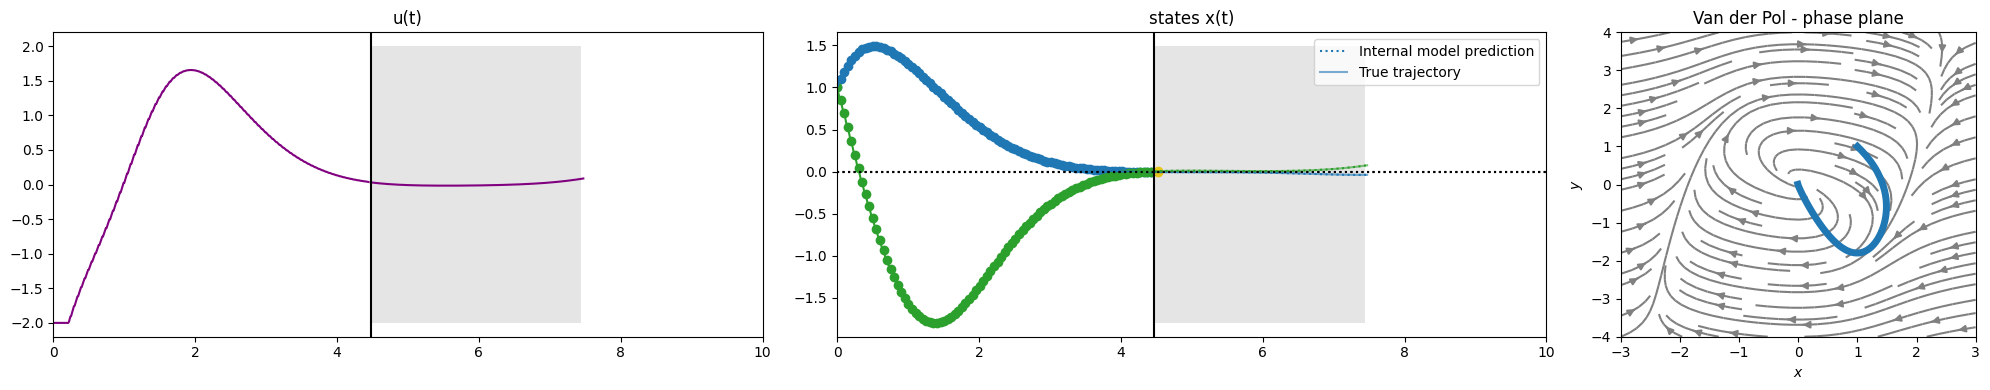

Traj. opt. times:  [(0.0571, Array(10, dtype=int64, weak_type=True)), (0.0209, Array(10, dtype=int64, weak_type=True)), (0.0228, Array(10, dtype=int64, weak_type=True)), (0.0196, Array(10, dtype=int64, weak_type=True)), (0.0218, Array(10, dtype=int64, weak_type=True)), (0.0283, Array(10, dtype=int64, weak_type=True)), (0.0193, Array(10, dtype=int64, weak_type=True)), (0.0193, Array(10, dtype=int64, weak_type=True)), (0.0198, Array(10, dtype=int64, weak_type=True)), (0.0198, Array(10, dtype=int64, weak_type=True))]


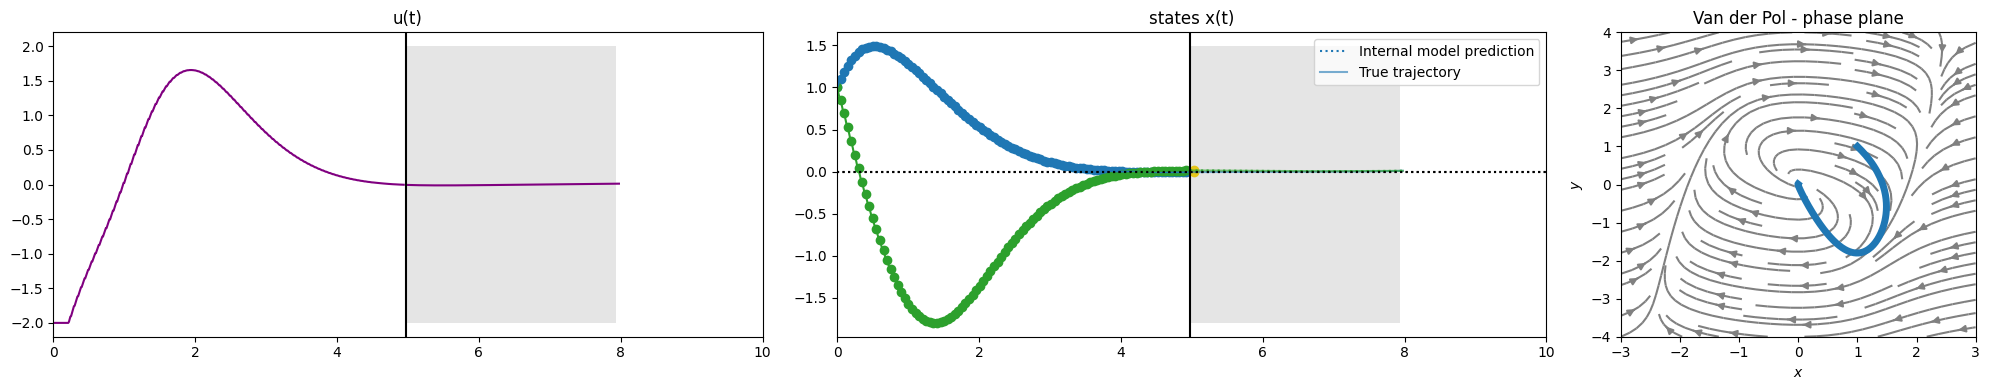

Traj. opt. times:  [(0.0209, Array(10, dtype=int64, weak_type=True)), (0.024, Array(10, dtype=int64, weak_type=True)), (0.0217, Array(10, dtype=int64, weak_type=True)), (0.0195, Array(10, dtype=int64, weak_type=True)), (0.0193, Array(10, dtype=int64, weak_type=True)), (0.0211, Array(10, dtype=int64, weak_type=True)), (0.0187, Array(10, dtype=int64, weak_type=True)), (0.0184, Array(10, dtype=int64, weak_type=True)), (0.0182, Array(10, dtype=int64, weak_type=True)), (0.0192, Array(10, dtype=int64, weak_type=True))]


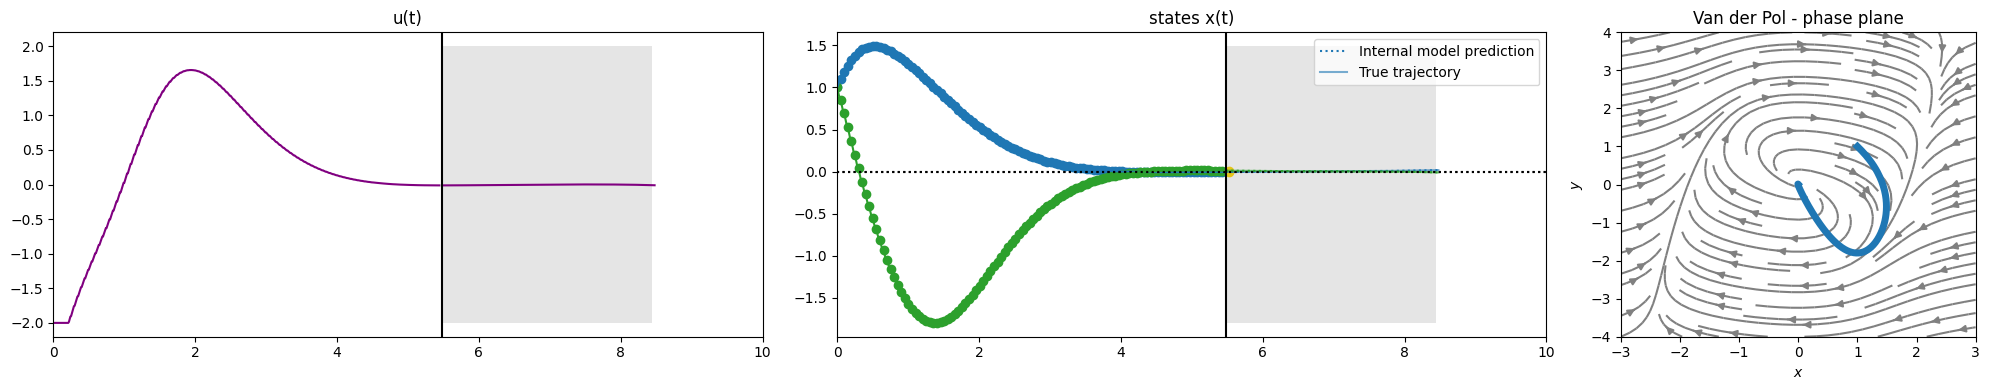

Traj. opt. times:  [(0.0252, Array(10, dtype=int64, weak_type=True)), (0.021, Array(10, dtype=int64, weak_type=True)), (0.0205, Array(10, dtype=int64, weak_type=True)), (0.0201, Array(10, dtype=int64, weak_type=True)), (0.0215, Array(10, dtype=int64, weak_type=True)), (0.0216, Array(10, dtype=int64, weak_type=True)), (0.037, Array(10, dtype=int64, weak_type=True)), (0.0197, Array(10, dtype=int64, weak_type=True)), (0.0183, Array(9, dtype=int64, weak_type=True)), (0.0184, Array(9, dtype=int64, weak_type=True))]


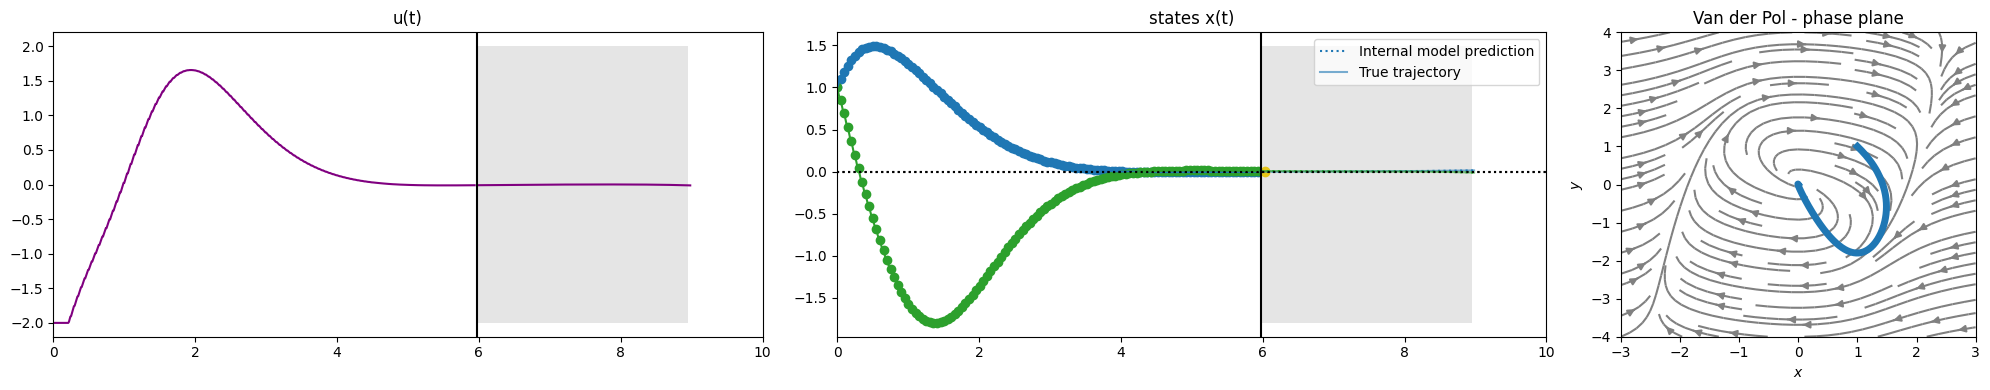

Traj. opt. times:  [(0.0186, Array(9, dtype=int64, weak_type=True)), (0.0197, Array(9, dtype=int64, weak_type=True)), (0.0207, Array(9, dtype=int64, weak_type=True)), (0.0245, Array(9, dtype=int64, weak_type=True)), (0.0296, Array(9, dtype=int64, weak_type=True)), (0.0243, Array(9, dtype=int64, weak_type=True)), (0.0248, Array(9, dtype=int64, weak_type=True)), (0.0237, Array(9, dtype=int64, weak_type=True)), (0.0179, Array(9, dtype=int64, weak_type=True)), (0.0222, Array(9, dtype=int64, weak_type=True))]


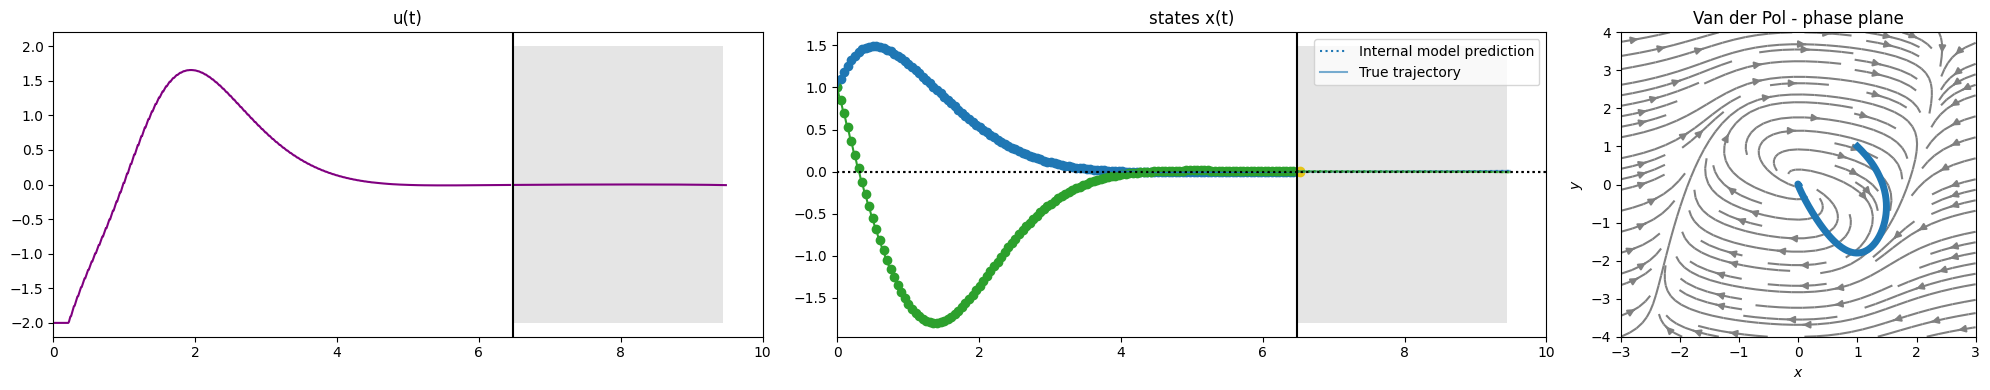

Traj. opt. times:  [(0.0508, Array(9, dtype=int64, weak_type=True)), (0.0266, Array(9, dtype=int64, weak_type=True)), (0.0286, Array(9, dtype=int64, weak_type=True)), (0.0184, Array(9, dtype=int64, weak_type=True)), (0.0173, Array(9, dtype=int64, weak_type=True)), (0.0187, Array(9, dtype=int64, weak_type=True)), (0.0178, Array(9, dtype=int64, weak_type=True)), (0.0184, Array(9, dtype=int64, weak_type=True)), (0.0184, Array(9, dtype=int64, weak_type=True)), (0.0182, Array(8, dtype=int64, weak_type=True))]


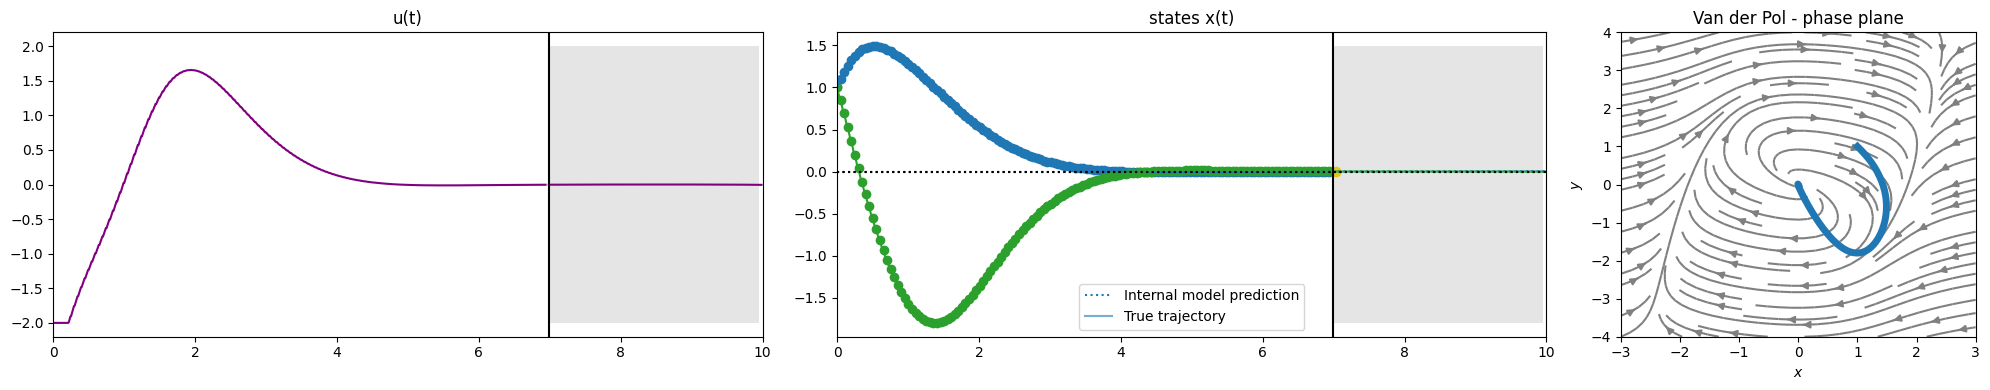

Traj. opt. times:  [(0.0194, Array(8, dtype=int64, weak_type=True)), (0.0222, Array(8, dtype=int64, weak_type=True)), (0.0187, Array(7, dtype=int64, weak_type=True)), (0.0166, Array(6, dtype=int64, weak_type=True)), (0.0172, Array(7, dtype=int64, weak_type=True)), (0.0187, Array(8, dtype=int64, weak_type=True)), (0.0188, Array(8, dtype=int64, weak_type=True)), (0.018, Array(8, dtype=int64, weak_type=True)), (0.0191, Array(8, dtype=int64, weak_type=True)), (0.0178, Array(8, dtype=int64, weak_type=True))]


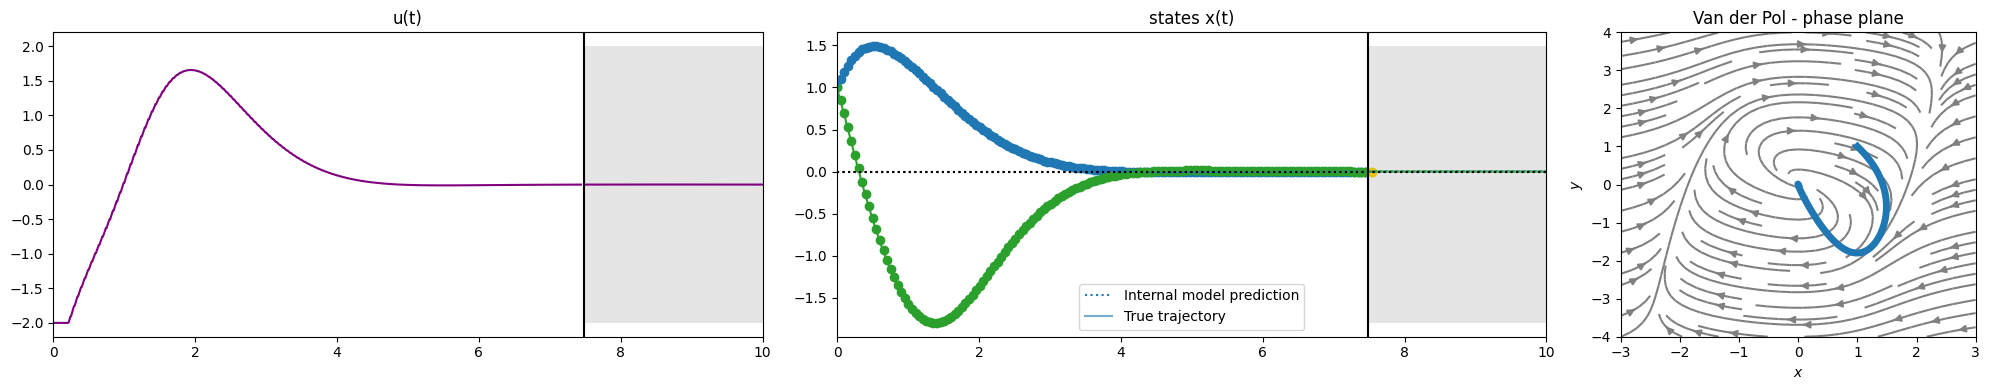

Traj. opt. times:  [(0.0497, Array(8, dtype=int64, weak_type=True)), (0.019, Array(8, dtype=int64, weak_type=True)), (0.0206, Array(8, dtype=int64, weak_type=True)), (0.0184, Array(8, dtype=int64, weak_type=True)), (0.0229, Array(8, dtype=int64, weak_type=True)), (0.0177, Array(8, dtype=int64, weak_type=True)), (0.0181, Array(8, dtype=int64, weak_type=True)), (0.0183, Array(8, dtype=int64, weak_type=True)), (0.0177, Array(8, dtype=int64, weak_type=True)), (0.0192, Array(8, dtype=int64, weak_type=True))]


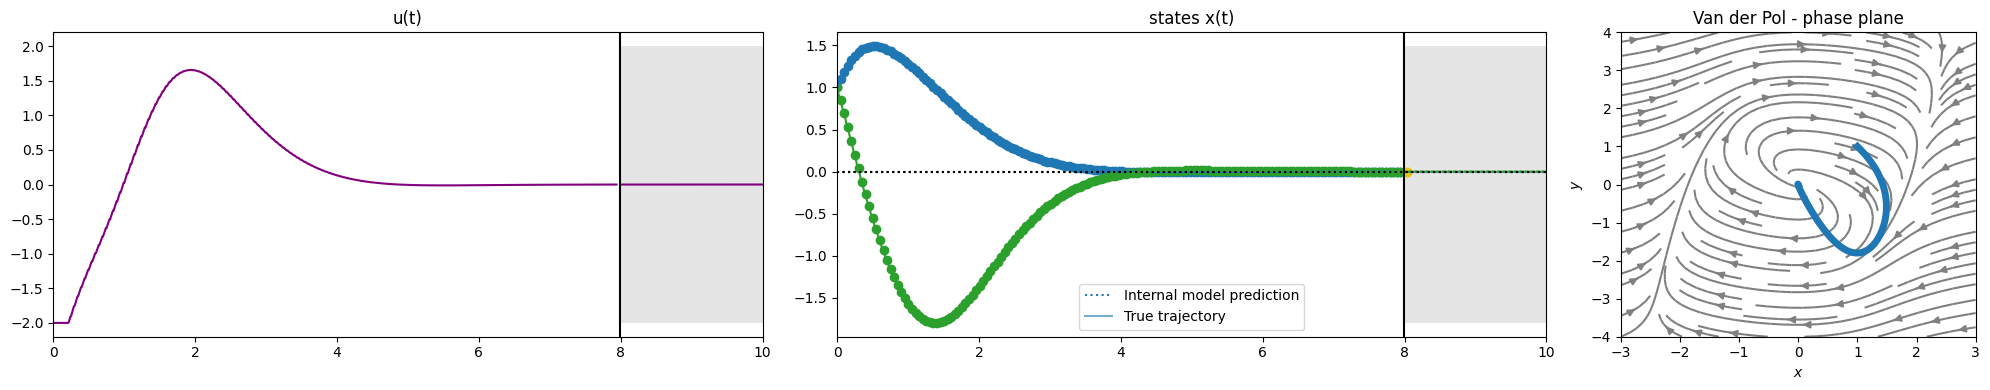

Traj. opt. times:  [(0.0177, Array(8, dtype=int64, weak_type=True)), (0.0168, Array(8, dtype=int64, weak_type=True)), (0.0175, Array(8, dtype=int64, weak_type=True)), (0.0169, Array(8, dtype=int64, weak_type=True)), (0.0165, Array(8, dtype=int64, weak_type=True)), (0.0158, Array(8, dtype=int64, weak_type=True)), (0.0159, Array(8, dtype=int64, weak_type=True)), (0.0162, Array(8, dtype=int64, weak_type=True)), (0.0154, Array(8, dtype=int64, weak_type=True)), (0.0153, Array(8, dtype=int64, weak_type=True))]


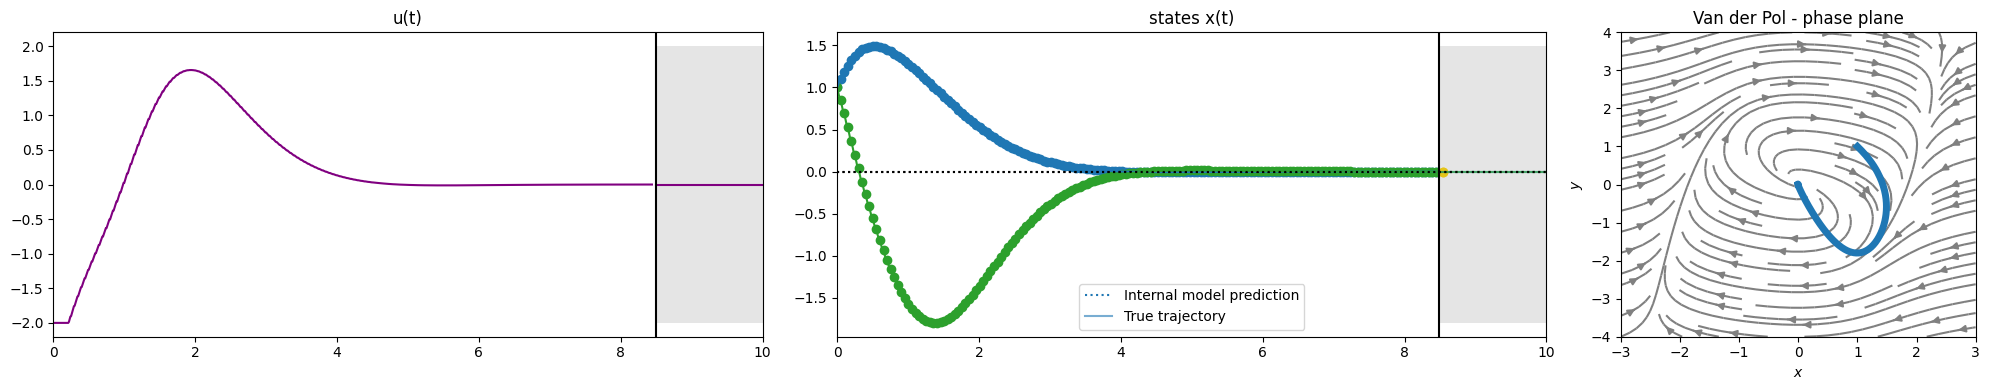

Traj. opt. times:  [(0.0169, Array(8, dtype=int64, weak_type=True)), (0.0192, Array(8, dtype=int64, weak_type=True)), (0.0186, Array(8, dtype=int64, weak_type=True)), (0.0178, Array(8, dtype=int64, weak_type=True)), (0.0167, Array(8, dtype=int64, weak_type=True)), (0.0166, Array(8, dtype=int64, weak_type=True)), (0.0155, Array(8, dtype=int64, weak_type=True)), (0.016, Array(8, dtype=int64, weak_type=True)), (0.0163, Array(8, dtype=int64, weak_type=True)), (0.016, Array(8, dtype=int64, weak_type=True))]


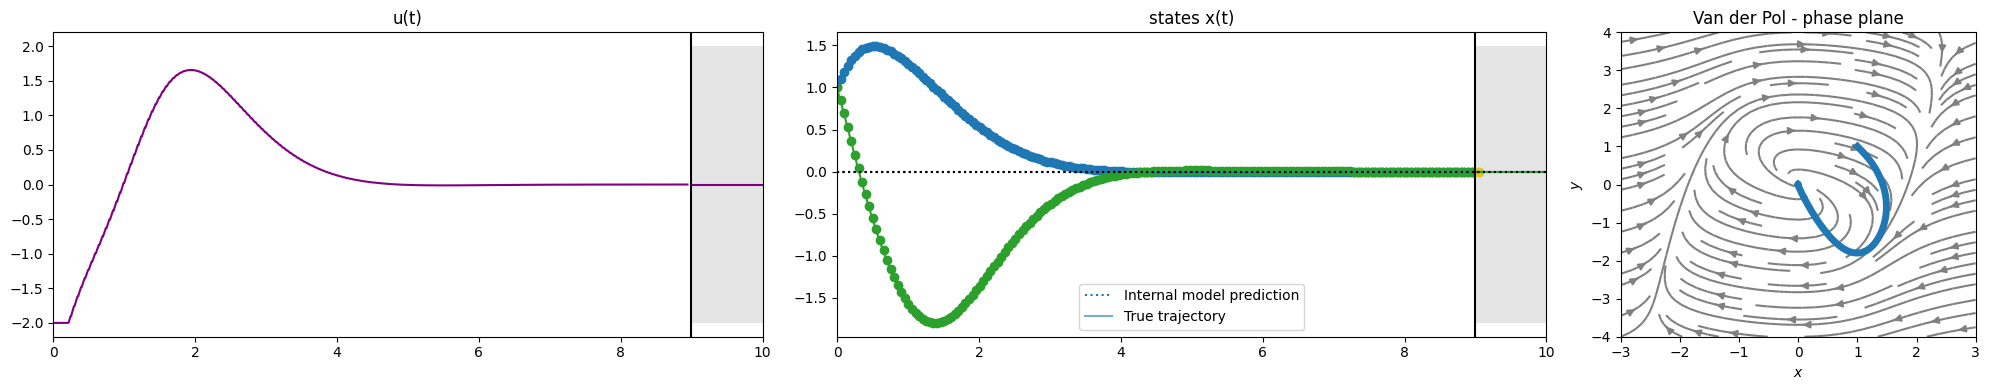

Traj. opt. times:  [(0.0219, Array(8, dtype=int64, weak_type=True)), (0.0184, Array(8, dtype=int64, weak_type=True)), (0.0175, Array(8, dtype=int64, weak_type=True)), (0.0202, Array(8, dtype=int64, weak_type=True)), (0.0158, Array(4, dtype=int64, weak_type=True)), (0.0183, Array(8, dtype=int64, weak_type=True)), (0.0159, Array(4, dtype=int64, weak_type=True)), (0.0169, Array(4, dtype=int64, weak_type=True)), (0.0174, Array(8, dtype=int64, weak_type=True)), (0.0152, Array(3, dtype=int64, weak_type=True))]


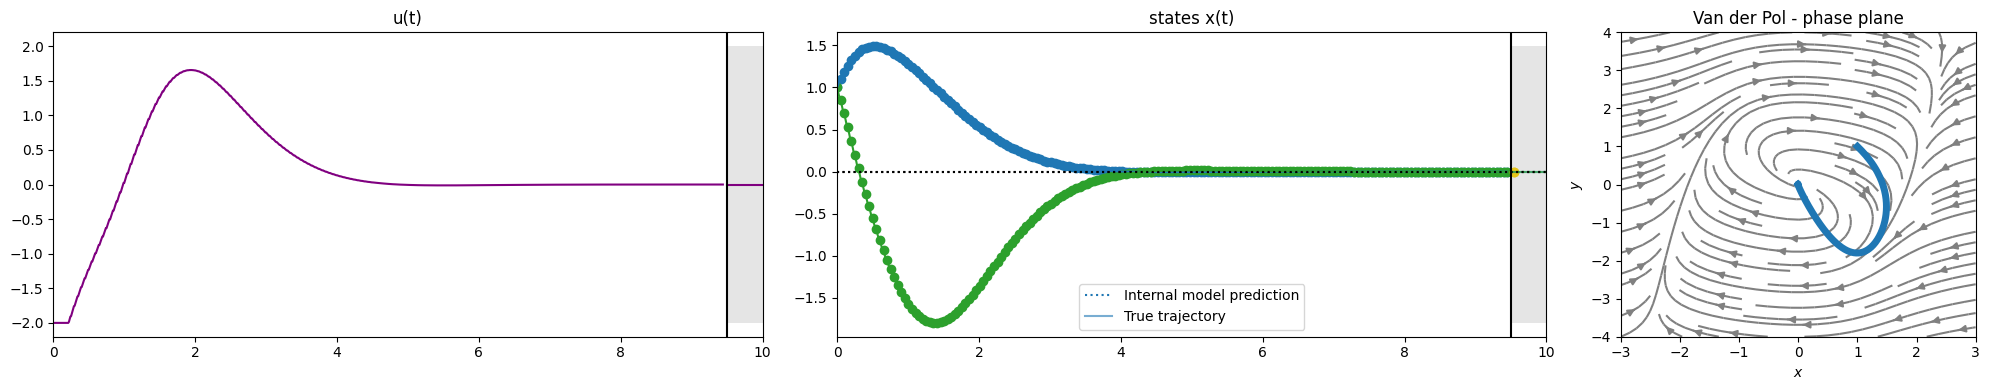

Traj. opt. times:  [(0.0166, Array(4, dtype=int64, weak_type=True)), (0.0182, Array(3, dtype=int64, weak_type=True)), (0.0171, Array(3, dtype=int64, weak_type=True)), (0.018, Array(3, dtype=int64, weak_type=True)), (0.0148, Array(3, dtype=int64, weak_type=True)), (0.0147, Array(3, dtype=int64, weak_type=True)), (0.0154, Array(3, dtype=int64, weak_type=True)), (0.0149, Array(3, dtype=int64, weak_type=True)), (0.0148, Array(3, dtype=int64, weak_type=True)), (0.0189, Array(9, dtype=int64, weak_type=True))]


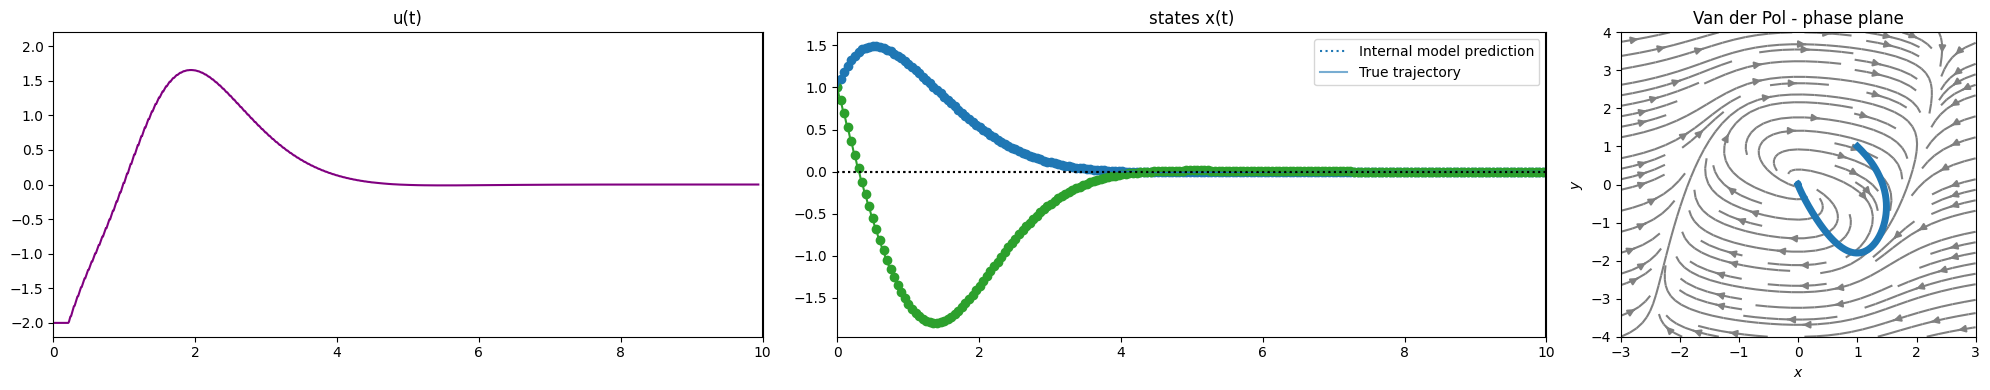

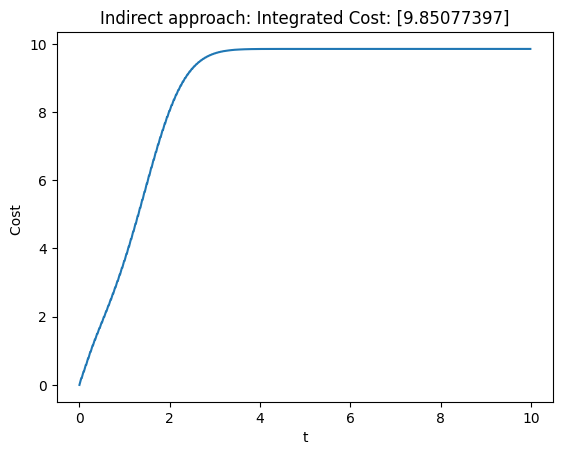

In [ ]:
from gpdx.control.trajectory_optimizers import PMPForward
from gpdx.control.mpc import indirect_MPC
n_segments = 4
pmp_solver = PMPForward(f=env.real_system.f,
                maxiter=maxiter,
                D_sys=env.D_sys,
                D_control=env.D_control,
                n_segments=n_segments,
                state_cost=env.state_cost,
                termination_cost=env.termination_cost,
                lb=env.lb*jnp.ones_like(us_init[0]),
                ub=env.ub*jnp.ones_like(us_init[0]),
                )
        
indirect_mpc = indirect_MPC(traj_optimizer=pmp_solver,
    real_system=env.real_system,
    internal_system=env.real_system,
    state_cost=env.state_cost,
    termination_cost=env.termination_cost,
    verbose=True,
    )

ts, ts_dense, X, Y, U, R = indirect_mpc.simulate(x0=env.get_initial_condition(),
    ts=jnp.linspace(env.t0, env.tf, int( ((1/env.Delta_t))*(tf-t0))),
    Delta_t=env.Delta_t,
    dt0_internal=0.05,
    dt0_dense=1e-2,
    x_star=env.x_star,
    H=H,
    key=jr.PRNGKey(44))

plt.plot(ts_dense, R)
plt.title(f'Indirect approach: Integrated Cost: {R[-1]}')
plt.ylabel('Cost ')
plt.xlabel('t')
plt.show()

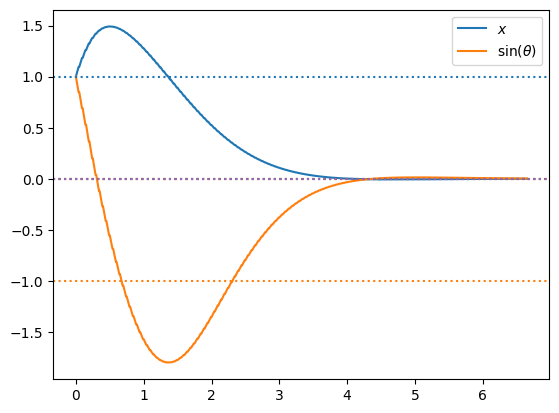

In [ ]:
end_idx = int(ts_dense.shape[0]/1.5)
names = [r'$x$', r'$\sin(\theta)$', r'$\cos(\theta)$', r'$\dot{x}$', r'$\dot{\theta}$']
for i in range(env.D_sys):
    plt.plot(ts_dense[:end_idx], X[:end_idx,i], label=names[i])
plt.axhline(y=1., color='C0', linestyle=':')
plt.axhline(y=-1, color='C1', linestyle=':')
plt.axhline(y=0., color='C2', linestyle=':')
plt.axhline(y=0., color='C3', linestyle=':')
plt.axhline(y=0., color='C4', linestyle=':')
plt.legend()
plt.show()